In [61]:
# Show plots as part of the notebook and make tools available
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Standard library packages
import os
import sys

# Import Numpy, Pandas and Seaborn
import numpy as np
import pandas as pd
import seaborn as sns

# Import Biopython tools for running local BLASTX
import subprocess
from Bio.Blast.Applications import NcbiblastpCommandline
from Bio.Align.Applications import MuscleCommandline
from Bio import AlignIO
from Bio import SeqIO
import sys

# Colour scale transformation
from matplotlib.colors import LogNorm

# Sequence extraction
import re
from Bio import SeqIO

# Convexhull
from scipy.spatial import ConvexHull, convex_hull_plot_2d

import random

from matplotlib.patches import Patch

pd.options.mode.chained_assignment = None  # default='warn'

import math
from matplotlib import rc

In [62]:
## Remember to head back and copy paste file name for pathway
probability = pd.read_csv('abSENSE_results_09.13.2021_22.25/Detection_failure_probabilities', sep = '\t', comment = "#")
sugarcut = pd.read_csv('sugarcut.txt', sep = '\t')
bitscore_predicted = pd.read_csv('abSENSE_results_09.13.2021_22.25/Predicted_bitscores', sep = '\t', comment = "#")
bitscore_actual = pd.read_csv('all_bitscore.txt', sep = '\t', comment = "#").rename(columns={'Ortholog':'Gene'})

## Rename column
bitscore_actual = bitscore_actual.rename(columns={"Unnamed: 0":'Gene'})
## Fill N/A values with 0
bitscore_actual = bitscore_actual.fillna(0)

In [63]:
bitscore_actual

,ortholog,Chromochloris,Enallax costatus CCAP 276/31 v1.0,Scenedesmus obliquus EN0004 v1.0,Scenedesmus obliquus var. DOE0013 v1.0,Volvox carteri v2.1,Scenedesmus obliquus UTEX 393,Scenedesmus obliquus var. UTEX2630 v1.0,Tetradesmus obliquus UTEX B 72 v1.0,Gonium pectorale NIES-2863,...,Chlorella sp. A99,Micromonas commoda NOUM17 (RCC 299),Micromonas pusilla CCMP1545,Ulva mutabilis Føyn,Chloropicon primus CCMP1205,Prasinoderma coloniale CCMP1413,Ostreococcus tauri RCC4221 v3.0,Ostreococcus tauri RCC1115 v1.0,Dunaliella salina CCAP19/18,Bathycoccus prasinos RCC1105
0,Cz01g00020.t1,2156.0,1384.0,1438.0,1435.0,1301.0,1431.0,1434.0,1431.0,1335.0,...,930.0,1107.0,1110.0,1140.0,1113.0,1117.0,1053.0,997.0,1184.0,1006.0
1,Cz01g00030.t1,450.0,352.0,345.0,345.0,285.0,345.0,345.0,345.0,291.0,...,248.0,213.0,220.0,178.0,224.0,213.0,213.0,217.0,286.0,205.0
2,Cz01g00035.t1,197.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Cz01g00040.t1,4519.0,446.0,147.0,315.0,194.0,538.0,556.0,551.0,500.0,...,75.1,66.2,87.0,143.0,97.8,117.0,97.8,97.8,258.0,92.0
4,Cz01g00060.t1,678.0,49.7,50.8,50.8,47.4,50.8,50.8,50.8,124.0,...,47.4,42.7,43.9,44.3,52.8,53.9,60.8,58.2,134.0,41.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14063,UNPLg01000.t1,61.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14064,UNPLg01001.t1,368.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14065,UNPLg01002.t1,129.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14066,UNPLg01003.t1,315.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
dist_df = pd.read_csv('20210803_EvolutionaryDistance.csv')
dist_df = dist_df.fillna('Chromochloris')

In [65]:
for i in np.arange(1, len(bitscore_predicted.columns)):
    bitscore_predicted.iloc[:, i] =  bitscore_predicted.iloc[:, i].str.extract('(\d+\.\d+)').astype(float)
bitscore_predicted = bitscore_predicted.fillna(0)
order_pre = ['Gene'] + dist_df['SpeciesName'].tolist()
bitscore_predicted = bitscore_predicted.reindex(columns=order_pre)
first_column_pre = bitscore_predicted.pop('Chromochloris')
bitscore_predicted.insert(1, 'Chromochloris', first_column_pre)

In [66]:
whole = bitscore_predicted.copy()
for i in np.arange(1, len(bitscore_predicted.columns)):
    whole[bitscore_predicted.columns[i]] =  np.log2((bitscore_actual.iloc[:, i]+1) / (bitscore_predicted.iloc[:, i]+1))
whole

,Gene,Chromochloris,Enallax costatus CCAP 276/31 v1.0,Scenedesmus obliquus EN0004 v1.0,Scenedesmus obliquus var. DOE0013 v1.0,Volvox carteri v2.1,Scenedesmus obliquus UTEX 393,Scenedesmus obliquus var. UTEX2630 v1.0,Tetradesmus obliquus UTEX B 72 v1.0,Gonium pectorale NIES-2863,...,Chlorella sp. A99,Micromonas commoda NOUM17 (RCC 299),Micromonas pusilla CCMP1545,Ulva mutabilis Føyn,Chloropicon primus CCMP1205,Prasinoderma coloniale CCMP1413,Ostreococcus tauri RCC4221 v3.0,Ostreococcus tauri RCC1115 v1.0,Dunaliella salina CCAP19/18,Bathycoccus prasinos RCC1105
0,Cz01g00020.t1,0.193880,-0.043099,0.013315,0.010871,-0.123606,0.015171,0.025663,0.030453,-0.056012,...,-0.314346,0.064370,0.083092,0.163414,0.147994,0.154988,0.082367,0.003981,0.285191,0.107689
1,Cz01g00030.t1,-0.009311,0.121272,0.093843,0.094511,-0.171986,0.104563,0.113512,0.122925,-0.105485,...,-0.019280,-0.084446,-0.020225,-0.274008,0.079004,0.008859,0.023791,0.050919,0.487822,0.078283
2,Cz01g00035.t1,7.629357,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Cz01g00040.t1,0.004306,-0.112077,-1.696836,-0.597991,-1.239664,0.239007,0.346121,0.395654,0.364892,...,-0.259238,0.568313,1.073655,2.110743,1.716186,1.986371,1.826316,1.829426,3.477029,2.436501
4,Cz01g00060.t1,0.052203,-1.203241,-1.164592,-1.161234,-1.216974,-1.109896,-1.063876,-1.015789,0.338907,...,0.572350,1.185776,1.311523,1.568811,1.927824,1.967263,2.209687,2.149839,3.530847,2.189359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14063,UNPLg01000.t1,5.968091,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14064,UNPLg01001.t1,8.527477,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14065,UNPLg01002.t1,7.022368,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14066,UNPLg01003.t1,8.303781,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [67]:
### Exclude eustigma and dunaliella, as well as chromochloris-specific genes
new_whole = whole.drop(columns=['Chlamydomonas eustigma NIES-2499', 'Dunaliella salina CCAP19/18'])[whole['Chromochloris']<=2]

In [68]:
new_whole

,Gene,Chromochloris,Enallax costatus CCAP 276/31 v1.0,Scenedesmus obliquus EN0004 v1.0,Scenedesmus obliquus var. DOE0013 v1.0,Volvox carteri v2.1,Scenedesmus obliquus UTEX 393,Scenedesmus obliquus var. UTEX2630 v1.0,Tetradesmus obliquus UTEX B 72 v1.0,Gonium pectorale NIES-2863,...,Caulerpa lentillifera,Chlorella sp. A99,Micromonas commoda NOUM17 (RCC 299),Micromonas pusilla CCMP1545,Ulva mutabilis Føyn,Chloropicon primus CCMP1205,Prasinoderma coloniale CCMP1413,Ostreococcus tauri RCC4221 v3.0,Ostreococcus tauri RCC1115 v1.0,Bathycoccus prasinos RCC1105
0,Cz01g00020.t1,0.193880,-0.043099,0.013315,0.010871,-0.123606,0.015171,0.025663,0.030453,-0.056012,...,-0.207763,-0.314346,0.064370,0.083092,0.163414,0.147994,0.154988,0.082367,0.003981,0.107689
1,Cz01g00030.t1,-0.009311,0.121272,0.093843,0.094511,-0.171986,0.104563,0.113512,0.122925,-0.105485,...,-0.346872,-0.019280,-0.084446,-0.020225,-0.274008,0.079004,0.008859,0.023791,0.050919,0.078283
3,Cz01g00040.t1,0.004306,-0.112077,-1.696836,-0.597991,-1.239664,0.239007,0.346121,0.395654,0.364892,...,0.115928,-0.259238,0.568313,1.073655,2.110743,1.716186,1.986371,1.826316,1.829426,2.436501
4,Cz01g00060.t1,0.052203,-1.203241,-1.164592,-1.161234,-1.216974,-1.109896,-1.063876,-1.015789,0.338907,...,-5.081936,0.572350,1.185776,1.311523,1.568811,1.927824,1.967263,2.209687,2.149839,2.189359
5,Cz01g00070.t1,0.280850,-0.215497,-0.392207,-0.365886,-0.291364,-0.192577,-0.227552,-0.305410,-0.222577,...,0.214683,-0.108392,0.463409,0.504690,0.652584,-1.292328,0.599280,0.651204,0.656007,0.516143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14045,UNPLg00981.t1,-0.001100,0.606279,-0.724266,-6.459759,-6.418865,-6.410070,-6.365448,-6.318859,-6.237640,...,-4.744699,-4.689858,-3.958843,-3.874797,-3.640390,-3.534809,-3.524816,-3.456806,-3.454176,-2.967169
14048,UNPLg00984.t1,0.016111,-1.470535,-0.137420,-7.429030,-0.664569,0.343266,0.255084,0.376247,-0.372568,...,-5.888013,0.476753,-5.169123,-5.092123,-4.874305,-4.775577,-4.766065,-4.702103,-4.699885,-4.235727
14050,UNPLg00986.t1,0.012079,-1.047777,-6.344296,-6.341096,-0.180206,-6.292598,-6.249256,-6.203788,-6.124535,...,-4.669594,-4.615887,-3.904002,-3.822730,1.738159,-3.491853,-3.481557,-3.415488,-3.414136,-2.939227
14052,UNPLg00989.t1,0.002185,-5.795975,-5.791554,-5.789729,-5.765004,-5.759688,-5.733083,-5.705149,-5.656496,...,-4.758090,-4.724650,-4.280214,-4.228819,-4.084915,-4.018812,-4.012569,-3.970854,-3.969012,-3.661065


In [69]:
sphaeropleales = ['Gene', 'Chromochloris']
for i in new_whole.columns.tolist():
    if "desmus" in i or "Enal" in i or "Raphido" in i or "neglectum" in i:
        sphaeropleales.append(i)
Chlamydomonales = ['Gene']
for i in new_whole.columns.tolist():
    if "Chlamydomo" in i or "Volvox" in i or "Gonium" in i:
        Chlamydomonales.append(i)
Trebouxiouphycean = ['Gene']
for i in new_whole.columns.tolist():
    if "chlorella" in i or "Chlorella" in i or 'Asteroc' in i or 'Micractinium' in i or 'Trebouxia' in i:
        Trebouxiouphycean.append(i)
others=[]
for i in new_whole.columns.tolist():
    if (i not in Chlamydomonales) and (i not in sphaeropleales) and (i not in Trebouxiouphycean):
        others.append(i)

In [70]:
new_whole['sph'] = new_whole[sphaeropleales[1:]].apply(lambda x: (x>-0.5).sum(), axis=1)
new_whole['tre'] = new_whole[Trebouxiouphycean[1:]].apply(lambda x: (x>-0.5).sum(), axis=1)
new_whole['NOTchlamy'] = new_whole[Chlamydomonales[1:]].apply(lambda x: (x<-0.5).sum(), axis=1)
new_whole['others'] = new_whole[others].apply(lambda x: (x>-0.5).sum(), axis=1)
new_whole['chlamy'] = new_whole[Chlamydomonales[1:]].apply(lambda x: (x>-0.5).sum(), axis=1)

In [71]:
dist_df = pd.read_csv('20210803_EvolutionaryDistance.csv')
dist_df = dist_df.fillna('Chromochloris')

In [72]:
new_whole.rename

<bound method DataFrame.rename of                 Gene  Chromochloris  Enallax costatus CCAP 276/31 v1.0  \
0      Cz01g00020.t1       0.193880                          -0.043099   
1      Cz01g00030.t1      -0.009311                           0.121272   
3      Cz01g00040.t1       0.004306                          -0.112077   
4      Cz01g00060.t1       0.052203                          -1.203241   
5      Cz01g00070.t1       0.280850                          -0.215497   
...              ...            ...                                ...   
14045  UNPLg00981.t1      -0.001100                           0.606279   
14048  UNPLg00984.t1       0.016111                          -1.470535   
14050  UNPLg00986.t1       0.012079                          -1.047777   
14052  UNPLg00989.t1       0.002185                          -5.795975   
14067  UNPLg01004.t1       0.019110                           0.244852   

       Scenedesmus obliquus EN0004 v1.0  \
0                              0.0

In [73]:
### calculate 80% thereshold for each clade, rounded down to nearest integer
sph_len = math.floor(len(sphaeropleales[1:]) * 0.8)
tre_len = math.floor(len(Trebouxiouphycean[1:]) * 0.8)
chl_len = math.floor(len(Chlamydomonales[1:]) * 0.8)
oth_len = math.floor(len(others) * 0.8)

In [74]:
palette = sns.color_palette()
color_dict = {}
for col in new_whole.columns:
    if col in sphaeropleales and col != 'Gene':
        color_dict[col] = palette[2]
    elif col in Chlamydomonales and col != 'Gene':
        color_dict[col] = palette[1]
    elif col in Trebouxiouphycean and col != 'Gene':
        color_dict[col] = palette[0]
    else:
        color_dict[col] = palette[3]
color_rows = pd.Series(color_dict)

### Part 1: SphaeroCut

In [75]:
### Proteins that are significantly only in sph
sph = new_whole[(new_whole['sph'] >= sph_len) & (new_whole['tre'] == 0) & (new_whole['others'] == 0) & (new_whole['NOTchlamy'] >= chl_len)].drop(columns=['sph', 'tre', 'NOTchlamy', 'others'])
new_whole.columns

Index(['Gene', 'Chromochloris', 'Enallax costatus CCAP 276/31 v1.0',
       'Scenedesmus obliquus EN0004 v1.0',
       'Scenedesmus obliquus var. DOE0013 v1.0', 'Volvox carteri v2.1',
       'Scenedesmus obliquus UTEX 393',
       'Scenedesmus obliquus var. UTEX2630 v1.0',
       'Tetradesmus obliquus UTEX B 72 v1.0', 'Gonium pectorale NIES-2863',
       'Raphidocelis subcapitata NIES-35', 'Scenedesmus sp. NREL 46B-D3 v1.0',
       'Trebouxia sp. A1-2', 'Asterochloris glomerata Cgr/DA1pho v2.0',
       'Chlamydomonas schloesseri CCAP 11/173',
       'Chlamydomonas incerta SAG 7.73', 'Chlamydomonas reinhardtii v5.6',
       'Desmodesmus armatus UTEX B 2533 v2.0',
       'Chlorella sorokiniana str. 1228', 'Picochlorum soloecismus DOE101',
       'Chlorella sorokiniana DOE1412', 'Monoraphidium neglectum SAG 48.87',
       'Chlorella sorokiniana UTEX 1602',
       'Auxenochlorella protothecoides UTEX 25',
       'Micractinium conductrix SAG 241.80', 'Chlorella sorokiniana UTEX 1230',
     

In [76]:
palette = sns.color_palette()
handles_one = [Patch(facecolor=palette[2], label = 'Sphaeropleales'), 
          Patch(facecolor=palette[1], label = 'Chlamydomonales'),
          Patch(facecolor=palette[0], label = 'Trebouxiouphycean'),
          Patch(facecolor=palette[3], label = 'Other')]

/Users/lucytian/opt/anaconda3/lib/python3.8/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


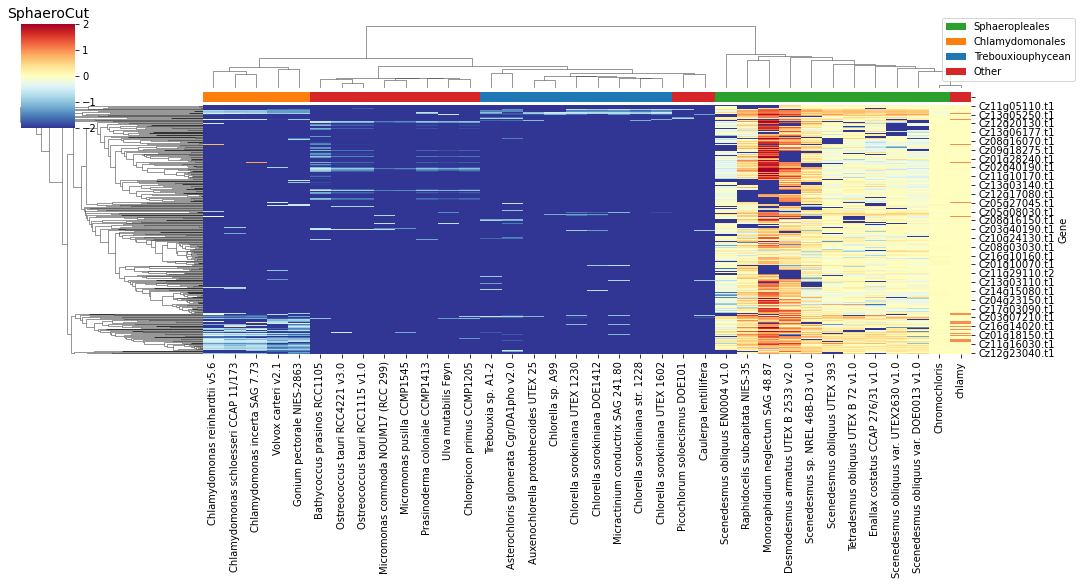

In [77]:
sns.clustermap(sph.set_index('Gene'), cmap="RdYlBu_r", vmin=-2, vmax=2, center=0, col_colors=color_rows, xticklabels=True, figsize = (15, 8))
plt.title('SphaeroCut', fontsize=14)
plt.legend(handles=handles_one, bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.savefig('sph.png', bbox_inches='tight')

### Part2. SugarCut

In [78]:
### Proteins that are up-regulated in sph and tre but down-regulated in chlamy
su = new_whole[(new_whole['sph'] >= sph_len) & (new_whole['tre'] >= tre_len) & (new_whole['others'] <= oth_len) & (new_whole['NOTchlamy'] >= chl_len)].drop(columns=['sph', 'tre', 'NOTchlamy', 'others'])
su

,Gene,Chromochloris,Enallax costatus CCAP 276/31 v1.0,Scenedesmus obliquus EN0004 v1.0,Scenedesmus obliquus var. DOE0013 v1.0,Volvox carteri v2.1,Scenedesmus obliquus UTEX 393,Scenedesmus obliquus var. UTEX2630 v1.0,Tetradesmus obliquus UTEX B 72 v1.0,Gonium pectorale NIES-2863,...,Chlorella sp. A99,Micromonas commoda NOUM17 (RCC 299),Micromonas pusilla CCMP1545,Ulva mutabilis Føyn,Chloropicon primus CCMP1205,Prasinoderma coloniale CCMP1413,Ostreococcus tauri RCC4221 v3.0,Ostreococcus tauri RCC1115 v1.0,Bathycoccus prasinos RCC1105,chlamy
25,Cz01g00310.t1,0.025018,-0.108435,-0.663761,-0.081952,-7.985500,-0.423778,-0.005701,0.037910,-7.838763,...,0.625571,-5.963705,-5.892877,-5.693487,-5.602588,0.264030,-5.535120,-5.533252,-5.104337,0
134,Cz01g05110.t1,0.014077,0.170939,-0.061110,-0.022968,-1.692118,0.188686,0.049919,0.137476,-7.516409,...,0.788642,0.598302,0.732033,-4.894333,0.717459,-4.773469,1.211983,1.285971,-4.184280,0
204,Cz01g08030.t1,0.061689,-0.256531,-7.228145,-0.203177,-7.194166,-0.165083,-0.141970,-0.117487,-1.112551,...,0.800230,1.233631,1.166297,1.107326,-4.942515,-4.934517,0.705747,1.249476,1.419733,1
212,Cz01g08130.t1,-0.064270,0.313949,0.387418,0.386046,-8.392360,0.451703,0.441135,0.486013,-1.434617,...,-7.431372,-7.014020,-6.965669,0.447290,-6.766463,-6.760487,-6.720005,-6.718773,-6.423074,0
236,Cz01g09110.t1,0.121173,0.206055,0.221301,0.224752,-2.285793,0.256041,0.265205,0.289227,-1.432235,...,0.481833,-0.635617,-1.355529,0.273941,0.052484,0.252570,0.312881,0.211248,0.564423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13723,UNPLg00333.t1,-0.019762,0.049750,0.047699,0.049645,-7.772677,0.077835,0.103147,0.129665,-7.669665,...,-6.781229,-6.351204,-6.301405,-6.160678,-6.096557,-6.090430,-6.048759,-6.047451,-5.743623,0
13793,UNPLg00449.t1,0.016194,-0.418879,-0.400690,-0.455679,-6.199476,-0.400419,-0.350958,-0.288706,-5.997970,...,1.218258,-3.482848,-3.392317,-3.140779,-3.026800,-3.016140,-2.942984,-2.941106,-2.424922,0
13799,UNPLg00457.t1,-0.019429,0.436183,0.308317,0.298106,-1.016068,0.338098,-0.012346,0.389379,-1.057364,...,0.005071,-6.168522,-6.119356,-5.980254,-0.380663,-5.910733,-5.869625,-5.868390,-5.568336,0
13803,UNPLg00465.t1,-0.019429,0.436183,0.308317,0.298106,-1.016068,0.338098,-0.012346,0.389379,-1.057364,...,0.005071,-6.168522,-6.119356,-5.980254,-0.380663,-5.910733,-5.869625,-5.868390,-5.568336,0


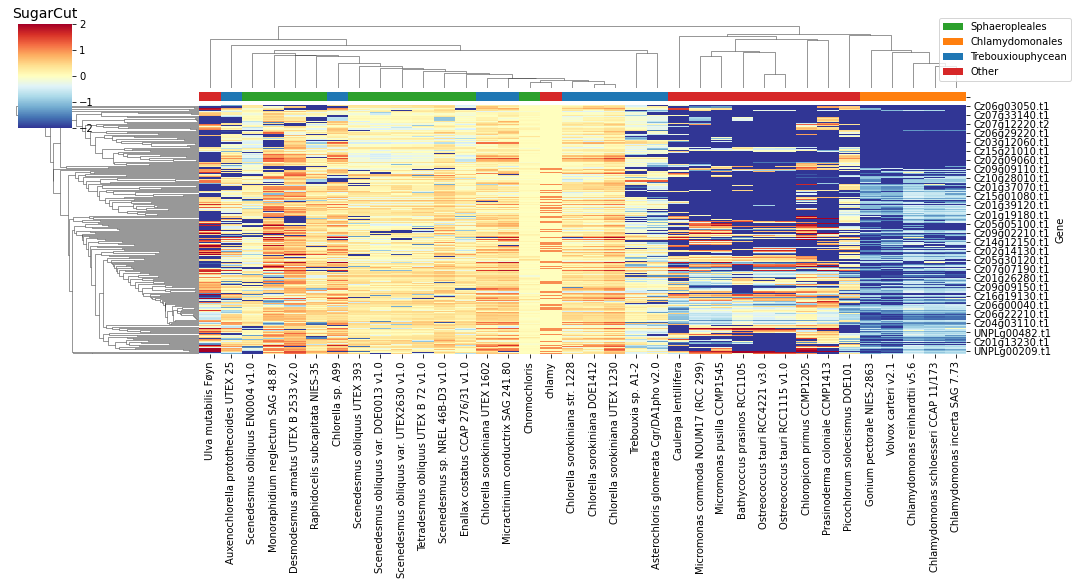

In [79]:
### Ulva not include into clustering
sns.clustermap(su.set_index('Gene'), cmap="RdYlBu_r", vmin=-2, vmax=2, center=0, col_colors=color_rows, xticklabels=True, figsize = (15, 8))
plt.legend(handles=handles_one, bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.title('SugarCut', fontsize=14)
plt.savefig('sugar.png', bbox_inches='tight')

In [80]:
### Should we include new_whole['others'] <= oth_len when doing SugarCut?

### Part3. ChlamyAbsent

In [81]:
new_whole[new_whole['chlamy'] >= chl_len]

,Gene,Chromochloris,Enallax costatus CCAP 276/31 v1.0,Scenedesmus obliquus EN0004 v1.0,Scenedesmus obliquus var. DOE0013 v1.0,Volvox carteri v2.1,Scenedesmus obliquus UTEX 393,Scenedesmus obliquus var. UTEX2630 v1.0,Tetradesmus obliquus UTEX B 72 v1.0,Gonium pectorale NIES-2863,...,Chloropicon primus CCMP1205,Prasinoderma coloniale CCMP1413,Ostreococcus tauri RCC4221 v3.0,Ostreococcus tauri RCC1115 v1.0,Bathycoccus prasinos RCC1105,sph,tre,NOTchlamy,others,chlamy
0,Cz01g00020.t1,0.193880,-0.043099,0.013315,0.010871,-0.123606,0.015171,0.025663,0.030453,-0.056012,...,0.147994,0.154988,0.082367,0.003981,0.107689,11,9,0,10,5
1,Cz01g00030.t1,-0.009311,0.121272,0.093843,0.094511,-0.171986,0.104563,0.113512,0.122925,-0.105485,...,0.079004,0.008859,0.023791,0.050919,0.078283,10,9,0,10,5
3,Cz01g00040.t1,0.004306,-0.112077,-1.696836,-0.597991,-1.239664,0.239007,0.346121,0.395654,0.364892,...,1.716186,1.986371,1.826316,1.829426,2.436501,9,7,1,9,4
4,Cz01g00060.t1,0.052203,-1.203241,-1.164592,-1.161234,-1.216974,-1.109896,-1.063876,-1.015789,0.338907,...,1.927824,1.967263,2.209687,2.149839,2.189359,3,8,1,9,4
5,Cz01g00070.t1,0.280850,-0.215497,-0.392207,-0.365886,-0.291364,-0.192577,-0.227552,-0.305410,-0.222577,...,-1.292328,0.599280,0.651204,0.656007,0.516143,11,9,0,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14035,UNPLg00971.t1,0.061651,0.098988,0.131884,0.132982,-0.373640,0.149667,0.164525,0.170165,-0.290124,...,0.044427,0.006823,0.089626,0.081838,0.416436,11,8,0,9,5
14041,UNPLg00977.t1,0.256613,-0.068253,-0.065980,0.025571,-0.392858,0.045477,0.055016,-0.016243,-0.390410,...,0.244942,0.255475,0.434925,0.442048,0.654976,11,8,0,9,5
14043,UNPLg00979.t1,0.067358,0.144948,0.123269,0.113965,-0.493234,0.136101,0.159576,0.176742,-0.299457,...,0.562425,0.245361,0.429410,0.430427,-6.906650,11,6,0,7,5
14048,UNPLg00984.t1,0.016111,-1.470535,-0.137420,-7.429030,-0.664569,0.343266,0.255084,0.376247,-0.372568,...,-4.775577,-4.766065,-4.702103,-4.699885,-4.235727,8,8,1,0,4


In [82]:
ch_ab = new_whole[(new_whole['sph'] >= sph_len) & (new_whole['tre'] >= tre_len) & (new_whole['others'] >= oth_len) & (new_whole['NOTchlamy'] >= chl_len)].drop(columns=['sph', 'tre', 'NOTchlamy', 'others'])
ch_ab

,Gene,Chromochloris,Enallax costatus CCAP 276/31 v1.0,Scenedesmus obliquus EN0004 v1.0,Scenedesmus obliquus var. DOE0013 v1.0,Volvox carteri v2.1,Scenedesmus obliquus UTEX 393,Scenedesmus obliquus var. UTEX2630 v1.0,Tetradesmus obliquus UTEX B 72 v1.0,Gonium pectorale NIES-2863,...,Chlorella sp. A99,Micromonas commoda NOUM17 (RCC 299),Micromonas pusilla CCMP1545,Ulva mutabilis Føyn,Chloropicon primus CCMP1205,Prasinoderma coloniale CCMP1413,Ostreococcus tauri RCC4221 v3.0,Ostreococcus tauri RCC1115 v1.0,Bathycoccus prasinos RCC1105,chlamy
17,Cz01g00220.t1,0.145238,0.082563,-1.170964,-0.033999,-1.624741,-0.066319,-0.095128,0.045556,-1.140707,...,0.551571,0.174411,0.217864,0.497449,1.230308,1.342159,0.831524,0.823677,1.002302,0
85,Cz01g03170.t1,0.175214,-0.006868,-1.904502,-1.183377,-1.249988,0.077457,-1.821466,-0.237945,-0.976714,...,1.288052,1.723224,1.720602,-0.917587,2.061248,1.970067,1.982902,1.981508,2.385262,0
115,Cz01g04140.t1,0.006292,0.196702,-1.639250,-0.407182,-1.442226,0.260000,0.492205,0.321845,-1.433320,...,2.767502,2.237426,2.193327,2.603659,2.893353,3.058330,2.665106,2.668124,3.409248,1
204,Cz01g08030.t1,0.061689,-0.256531,-7.228145,-0.203177,-7.194166,-0.165083,-0.141970,-0.117487,-1.112551,...,0.800230,1.233631,1.166297,1.107326,-4.942515,-4.934517,0.705747,1.249476,1.419733,1
221,Cz01g08230.t1,0.179285,0.046768,0.017664,0.002668,-1.361329,0.039288,0.056896,0.068854,-1.365757,...,0.269295,0.311561,0.250751,0.286048,0.230383,0.484652,0.239648,0.225229,0.422839,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13742,UNPLg00362.t1,0.131078,0.384859,0.172888,0.348595,-1.291290,-0.462676,-0.312610,0.443929,-1.185399,...,-2.154682,-0.444341,-0.346142,0.671552,0.934523,-0.287601,-0.299653,-0.292441,-0.039243,0
13795,UNPLg00451.t1,0.024478,0.261232,0.265471,0.229301,-0.993946,0.303453,0.283484,0.310306,-0.955247,...,0.077129,0.213653,0.170698,0.600429,0.727415,0.355882,0.352661,0.337240,0.633618,0
13796,UNPLg00453.t1,0.025254,0.278022,0.237490,0.231877,-0.980472,0.267452,0.284916,0.311242,-0.947852,...,0.043048,0.113737,0.172025,0.547098,0.734386,0.301069,0.326066,0.327251,0.636909,0
13810,UNPLg00482.t1,0.041434,0.334086,0.097855,0.129593,-0.959250,0.167861,0.196973,0.227365,-1.188271,...,0.358597,-0.063140,0.219900,1.092786,0.508131,0.599462,0.192517,-0.115820,1.059613,0


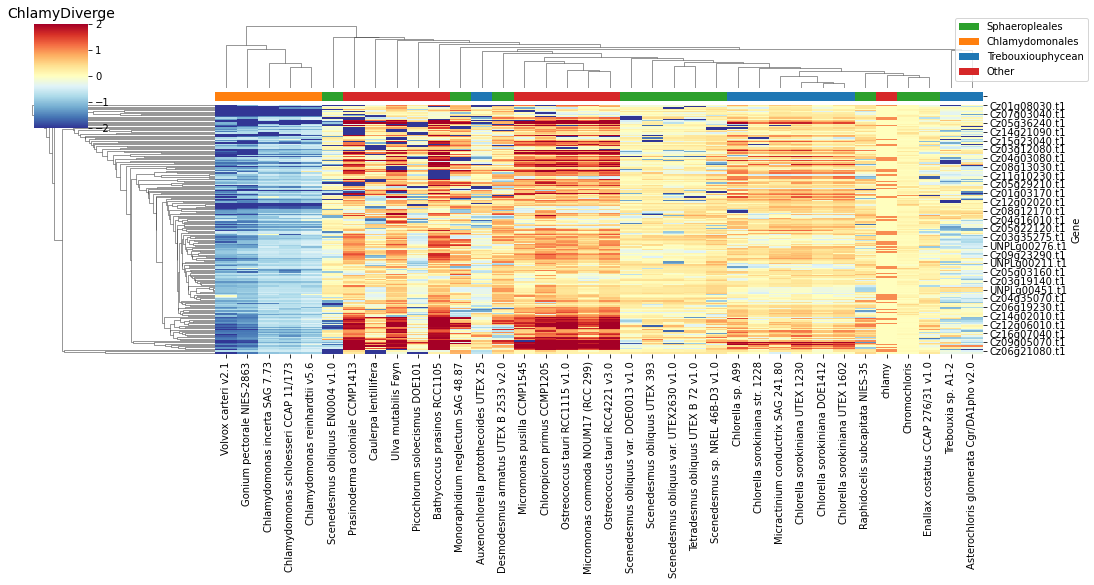

In [83]:
sns.clustermap(ch_ab.set_index('Gene'), cmap="RdYlBu_r", vmin=-2, vmax=2, center=0, col_colors=color_rows, xticklabels=True, figsize = (15, 8))
plt.legend(handles=handles_one, bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.title('ChlamyDiverge', fontsize=14)
plt.savefig('chab.png', bbox_inches='tight')

### Run DIAMOND Blast

In [84]:
with open("sph.fasta", "a") as output_handle:
    for seq_rec in SeqIO.parse("Cz.v5.3.5.peptide.fa", "fasta"):
        if seq_rec.name in sph['Gene'].tolist():
            SeqIO.write(seq_rec, output_handle, "fasta")

In [85]:
with open("su.fasta", "a") as output_handle:
    for seq_rec in SeqIO.parse("Cz.v5.3.5.peptide.fa", "fasta"):
        if seq_rec.name in su['Gene'].tolist():
            SeqIO.write(seq_rec, output_handle, "fasta")

In [86]:
with open("ch_ab.fasta", "a") as output_handle:
    for seq_rec in SeqIO.parse("Cz.v5.3.5.peptide.fa", "fasta"):
        if seq_rec.name in ch_ab['Gene'].tolist():
            SeqIO.write(seq_rec, output_handle, "fasta")

In [87]:
! diamond makedb --in 'Athaliana_447_Araport11.protein.fa' -d arabidopsis

diamond v0.9.14.115 | by Benjamin Buchfink <buchfink@gmail.com>
Licensed under the GNU AGPL <https://www.gnu.org/licenses/agpl.txt>
Check http://github.com/bbuchfink/diamond for updates.

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
Database file: Athaliana_447_Araport11.protein.fa
Opening the database file...  [0.004982s]
Loading sequences...  [0.123956s]
Masking sequences...  [0.896472s]
Writing sequences...  [0.108156s]
Loading sequences...  [5e-05s]
Writing trailer...  [0.003264s]
Closing the input file...  [1.4e-05s]
Closing the database file...  [0.001079s]
Processed 48455 sequences, 20907797 letters.
Total time = 1.13826s


In [88]:
! diamond blastp -q 'sph.fasta' -d 'arabidopsis' -o sph_ab.tsv --very-sensitive
! diamond blastp -q 'su.fasta' -d 'arabidopsis' -o su_ab.tsv --very-sensitive
! diamond blastp -q 'ch_ab.fasta' -d 'arabidopsis' -o chab_ab.tsv --very-sensitive

diamond v0.9.14.115 | by Benjamin Buchfink <buchfink@gmail.com>
Licensed under the GNU AGPL <https://www.gnu.org/licenses/agpl.txt>
Check http://github.com/bbuchfink/diamond for updates.

#CPU threads: 8
Scoring parameters: (Matrix=BLOSUM62 Lambda=0.267 K=0.041 Penalties=11/1)
#Target sequences to report alignments for: 25
Temporary directory: 
Opening the database...  [0.000464s]
Opening the input file...  [0.000366s]
Opening the output file...  [8.5e-05s]
Loading query sequences...  [0.020561s]
Masking queries...  [0.141053s]
Building query seed set...  [0.016011s]
Algorithm: Query-indexed
Building query histograms...  [0.089417s]
Allocating buffers...  [9.6e-05s]
Loading reference sequences...  [0.046674s]
Building reference histograms...  [0.585664s]
Allocating buffers...  [0.000148s]
Initializing temporary storage...  [0.016675s]
Processing query chunk 0, reference chunk 0, shape 0, index chunk 0.
Building reference index...  [0.040368s]
Building query index...  [0.032472s]
Buildi

Building reference index...  [0.034469s]
Building query index...  [0.018125s]
Building seed filter...  [0.001235s]
Searching alignments...  [0.002775s]
Processing query chunk 0, reference chunk 0, shape 12, index chunk 0.
Building reference index...  [0.040661s]
Building query index...  [0.016938s]
Building seed filter...  [0.001327s]
Searching alignments...  [0.004211s]
Processing query chunk 0, reference chunk 0, shape 13, index chunk 0.
Building reference index...  [0.034139s]
Building query index...  [0.015564s]
Building seed filter...  [0.001243s]
Searching alignments...  [0.002831s]
Processing query chunk 0, reference chunk 0, shape 14, index chunk 0.
Building reference index...  [0.035502s]
Building query index...  [0.015299s]
Building seed filter...  [0.001291s]
Searching alignments...  [0.002613s]
Processing query chunk 0, reference chunk 0, shape 15, index chunk 0.
Building reference index...  [0.037042s]
Building query index...  [0.015122s]
Building seed filter...  [0.001252

In [89]:
sph_ab = pd.read_csv('sph_ab.tsv', sep = '\t', header=None)
headers = ["query", "subject", "identity", "length",
           "mismatch", "gap_openings", "q_start",
           "q_end", "s_start", "s_end", "e-value", "bitscore"]
sph_ab.columns=headers
sph_ab = sph_ab.groupby('query').max('bitscore')

In [90]:
su_ab = pd.read_csv('su_ab.tsv', sep = '\t', header=None)
headers = ["query", "subject", "identity", "length",
           "mismatch", "gap_openings", "q_start",
           "q_end", "s_start", "s_end", "e-value", "bitscore"]
su_ab.columns=headers
su_ab = su_ab.groupby('query').max('bitscore')

In [91]:
chab_ab = pd.read_csv('chab_ab.tsv', sep = '\t', header=None)
headers = ["query", "subject", "identity", "length",
           "mismatch", "gap_openings", "q_start",
           "q_end", "s_start", "s_end", "e-value", "bitscore"]
chab_ab.columns=headers
chab_ab = chab_ab.groupby('query').max('bitscore').reset_index()

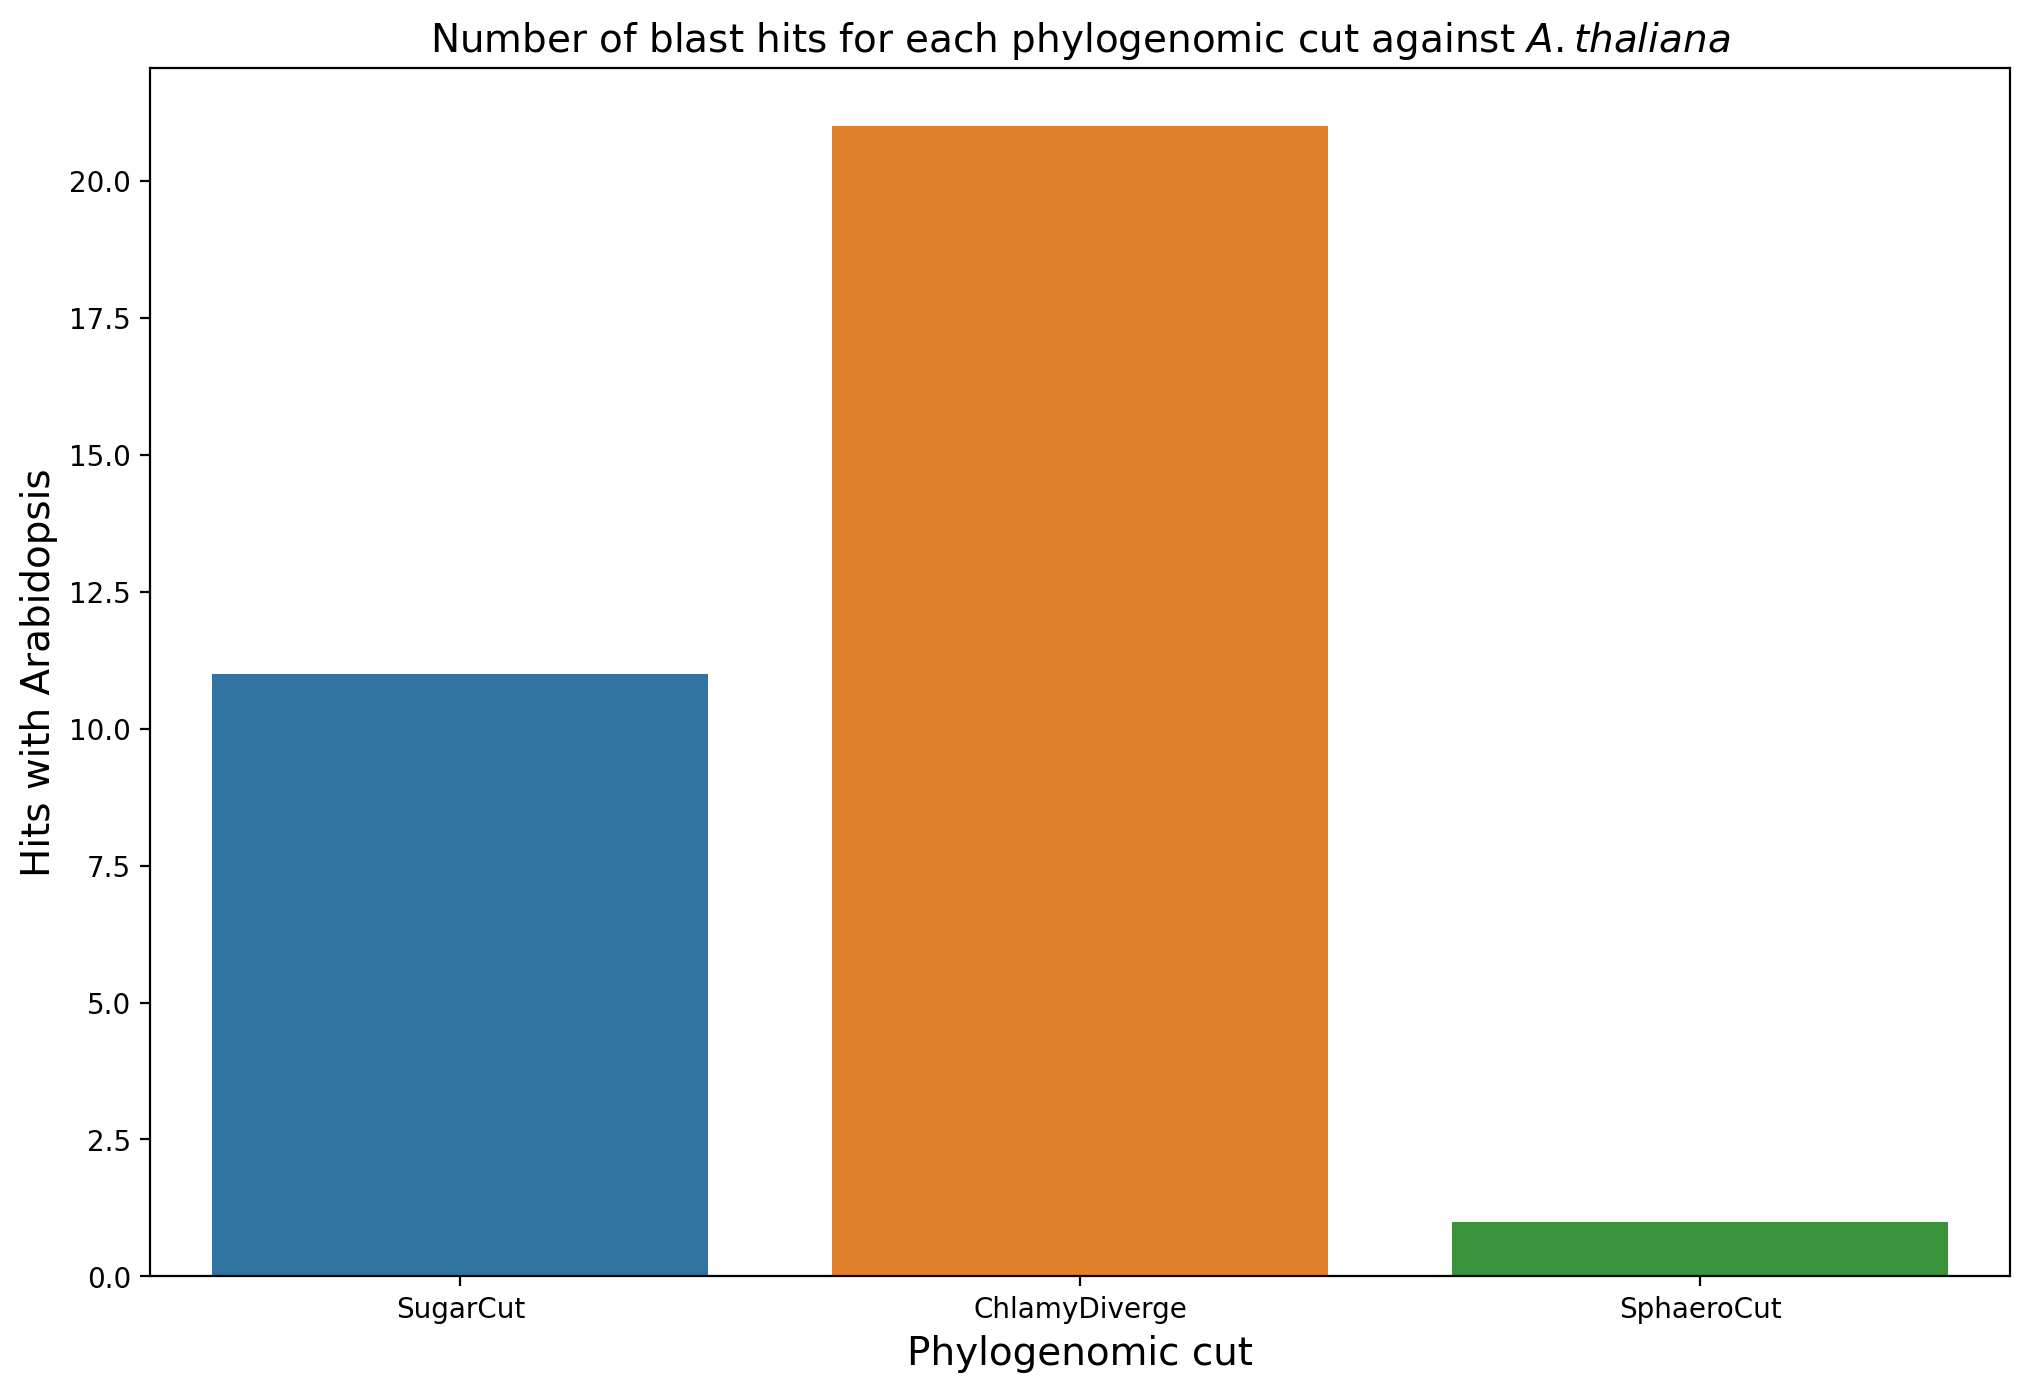

In [92]:
ab_df = pd.DataFrame()
ab_df['Cuts'] = ['SugarCut', 'ChlamyDiverge', 'SphaeroCut']
ab_df['Count'] = [len(su_ab), len(chab_ab), len(sph_ab)]
fig, ax = plt.subplots(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')
ax = sns.barplot(x='Cuts', y='Count', data=ab_df, dodge=False)
plt.xlabel('Phylogenomic cut', fontsize=14)
plt.ylabel('Hits with Arabidopsis', fontsize=14)
plt.title('Number of blast hits for each phylogenomic cut against $\it{A.thaliana}$', fontsize=14)
plt.savefig('arab_hit.png', bbox_inches='tight')

In [93]:
ab_df

,Cuts,Count
0,SugarCut,11
1,ChlamyDiverge,21
2,SphaeroCut,1


In [94]:
### Not there despite prediction to be there
probability = pd.read_csv('abSENSE_results_09.13.2021_22.25/Detection_failure_probabilities', sep = '\t', comment = "#")

### Eustigma Analysis

In [95]:
### log score account for 1/10 change

In [96]:
### Sphaero, Eustigma, not Chlamy
eu = whole[sphaeropleales + ['Chlamydomonas eustigma NIES-2499'] + Chlamydomonales[1:] + Trebouxiouphycean[1:]]
eu['sph'] = eu[sphaeropleales[1:]].apply(lambda x: (x>-0.5).sum(), axis=1)
eu['NOTchlamy'] = eu[Chlamydomonales[1:]].apply(lambda x: (x<-0.5).sum(), axis=1)
eu['tre'] = eu[Trebouxiouphycean[1:]].apply(lambda x: (x>-0.5).sum(), axis=1)
eu['eu']=eu[['Chlamydomonas eustigma NIES-2499']].apply(lambda x: (x>-0.5).sum(), axis=1)

In [97]:
### Sphaero, Eustigma, not Chlamy
eu = whole[sphaeropleales + ['Chlamydomonas eustigma NIES-2499'] + Chlamydomonales[1:]]
eu['sph'] = eu[sphaeropleales[1:]].apply(lambda x: (x>-0.5).sum(), axis=1)
eu['NOTchlamy'] = eu[Chlamydomonales[1:]].apply(lambda x: (x<-0.5).sum(), axis=1)
eu['eu']=eu[['Chlamydomonas eustigma NIES-2499']].apply(lambda x: (x>-0.5).sum(), axis=1)

In [98]:
same = eu[(eu['sph'] >= sph_len) & (eu['NOTchlamy'] >= chl_len)&(eu['eu'] == 1)].drop(columns=['sph',  'NOTchlamy', 'eu'])
same

,Gene,Chromochloris,Enallax costatus CCAP 276/31 v1.0,Scenedesmus obliquus EN0004 v1.0,Scenedesmus obliquus var. DOE0013 v1.0,Scenedesmus obliquus UTEX 393,Scenedesmus obliquus var. UTEX2630 v1.0,Tetradesmus obliquus UTEX B 72 v1.0,Raphidocelis subcapitata NIES-35,Scenedesmus sp. NREL 46B-D3 v1.0,Desmodesmus armatus UTEX B 2533 v2.0,Monoraphidium neglectum SAG 48.87,Chlamydomonas eustigma NIES-2499,Volvox carteri v2.1,Gonium pectorale NIES-2863,Chlamydomonas schloesseri CCAP 11/173,Chlamydomonas incerta SAG 7.73,Chlamydomonas reinhardtii v5.6
17,Cz01g00220.t1,0.145238,0.082563,-1.170964,-0.033999,-0.066319,-0.095128,0.045556,-0.088315,0.425563,-0.792558,-0.674797,0.055726,-1.624741,-1.140707,-0.834996,-0.762540,-0.649794
38,Cz01g01135.t1,0.068317,-0.140466,-0.172402,-6.448240,-0.053175,-0.235206,-0.008120,0.023712,0.153428,-5.820945,-5.538538,-0.417399,-0.498104,-6.303963,-5.966938,-5.935695,-5.851499
85,Cz01g03170.t1,0.175214,-0.006868,-1.904502,-1.183377,0.077457,-1.821466,-0.237945,-0.280112,0.103668,-0.352897,0.510938,-0.300120,-1.249988,-0.976714,-0.626290,-0.669878,-0.547634
121,Cz01g04220.t1,0.181993,-3.822128,0.065232,0.256021,0.320239,0.295831,0.319337,0.439803,-9.109700,-8.896756,0.409935,-0.389591,-3.800315,-9.212326,-3.443907,-3.319431,-8.916745
216,Cz01g08180.t1,0.005918,0.486640,-0.808879,0.328444,-8.210671,0.442570,0.400328,0.172253,-0.058913,0.737110,0.842673,-0.116707,-0.543738,-0.258480,-0.534153,-0.633272,-0.764615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13762,UNPLg00388.t2,0.042363,-8.014690,-0.281964,-0.065186,-0.032760,-0.039314,0.014977,0.177035,0.172406,-7.375474,0.393915,-0.072351,-7.981053,-7.862637,-0.890666,-7.491452,-7.406248
13781,UNPLg00415.t1,0.027370,-0.627088,0.030327,0.119040,0.230157,0.179853,0.139387,-0.358936,-0.149278,0.405143,0.466257,0.313184,-1.257410,-0.335728,-1.263358,-0.862053,-0.501701
13783,UNPLg00418.t1,0.055256,-0.328751,-0.067190,-0.042537,0.067632,-0.009437,0.132046,-0.054600,0.033704,0.401927,0.424890,0.145532,-1.026977,-0.427249,-0.910856,-0.531337,-0.502137
13898,UNPLg00640.t1,-0.049609,0.476930,0.325579,0.335863,0.448287,0.294324,0.457586,0.431814,0.790183,1.115372,1.056885,0.605503,-2.682321,-1.684727,-1.513156,-1.478079,-1.026997


In [99]:
hupgenes = pd.read_csv('/Users/lucytian/Chromochloris/20200917_HexoseTransporters.csv', sep= ',')
hupgenes

,Row_ID,Category
0,Cz03g02130.t1,HUP-like
1,Cz06g22210.t1,HUP-like
2,Cz12g01080.t1,HUP-like
3,Cz07g18160.t1,HUP-like
4,Cz04g34090.t1,HUP-like
5,Cz17g03120.t1,HUP-like
6,Cz11g27040.t1,HUP-like
7,Cz08g05120.t1,not HUP-like
8,Cz01g07160.t1,not HUP-like
9,Cz03g38140.t1,not HUP-like


In [100]:
### Count of hits with three groups/hup-likes, aware of one-direction blast repeats!
hupgenes['Row_ID'].isin(same['Gene'].tolist())

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8     False
9      True
10    False
Name: Row_ID, dtype: bool

In [101]:
color_dict3 = {}
for col in eu.columns:
    if col in sphaeropleales and col != 'Gene':
        color_dict3[col] = palette[2]
    elif col in Chlamydomonales and col != 'Gene':
        color_dict3[col] = palette[1]
    elif col == 'Chlamydomonas eustigma NIES-2499':
        color_dict3['Chlamydomonas eustigma NIES-2499'] = palette[4]
color_rows3 = pd.Series(color_dict3)
handles_three = [Patch(facecolor=palette[2], label = 'Sphaeropleales'), Patch(facecolor=palette[1], label = 'Chlamydomonales'), Patch(facecolor=palette[4], label = '$\it{C.eustigama}$')]

In [102]:
color_dict2 = {}
for col in eu.columns:
    if col in sphaeropleales and col != 'Gene':
        color_dict2[col] = palette[2]
    elif col in Chlamydomonales and col != 'Gene':
        color_dict2[col] = palette[1]
    elif col in Trebouxiouphycean and col != 'Gene':
        color_dict2[col] = palette[0]
    elif col == 'Chlamydomonas eustigma NIES-2499':
        color_dict2['Chlamydomonas eustigma NIES-2499'] = palette[4]
color_rows2 = pd.Series(color_dict2)
handles_two = [Patch(facecolor=palette[2], label = 'sphaeropleales'), Patch(facecolor=palette[1], label = 'Chlamydomonales'), Patch(facecolor=palette[0], label = 'Trebouxiouphycean'), Patch(facecolor=palette[4], label = 'eustigma')]

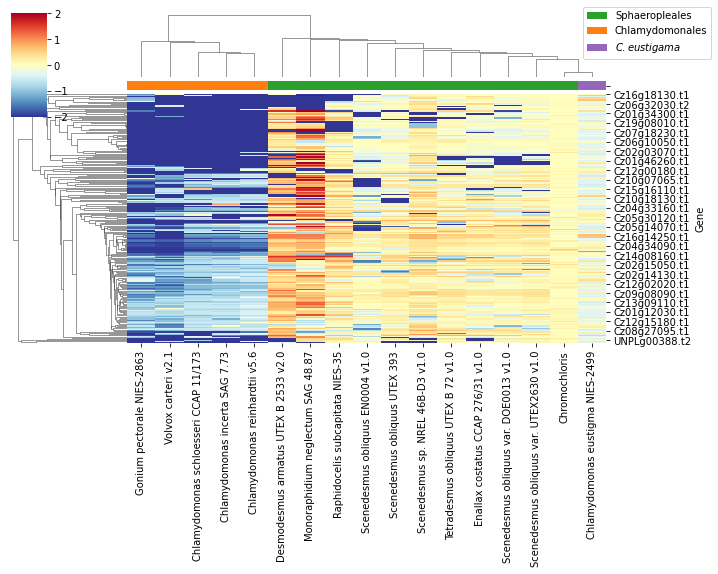

In [103]:
### More likely than other chlamys to have a hit with sugarcut
sns.clustermap(same.set_index('Gene'), cmap="RdYlBu_r", vmin=-2, vmax=2, center=0, col_colors=color_rows3, xticklabels=True, figsize = (10, 8))
plt.legend(handles=handles_three, bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')
plt.savefig('eus.png', bbox_inches='tight')

### Auxenochlorella

In [104]:
new_whole['auxe'] = new_whole[['Auxenochlorella protothecoides UTEX 25']].apply(lambda x: (x>-0.5).sum(), axis=1)

In [105]:
auxe = new_whole[(new_whole['sph'] >= sph_len) & (new_whole['tre'] >= tre_len) & (new_whole['auxe'] == 1)].drop(columns=['sph', 'tre', 'NOTchlamy', 'others'])
auxe

,Gene,Chromochloris,Enallax costatus CCAP 276/31 v1.0,Scenedesmus obliquus EN0004 v1.0,Scenedesmus obliquus var. DOE0013 v1.0,Volvox carteri v2.1,Scenedesmus obliquus UTEX 393,Scenedesmus obliquus var. UTEX2630 v1.0,Tetradesmus obliquus UTEX B 72 v1.0,Gonium pectorale NIES-2863,...,Micromonas commoda NOUM17 (RCC 299),Micromonas pusilla CCMP1545,Ulva mutabilis Føyn,Chloropicon primus CCMP1205,Prasinoderma coloniale CCMP1413,Ostreococcus tauri RCC4221 v3.0,Ostreococcus tauri RCC1115 v1.0,Bathycoccus prasinos RCC1105,chlamy,auxe
0,Cz01g00020.t1,0.193880,-0.043099,0.013315,0.010871,-0.123606,0.015171,0.025663,0.030453,-0.056012,...,0.064370,0.083092,0.163414,0.147994,0.154988,0.082367,0.003981,0.107689,5,1
1,Cz01g00030.t1,-0.009311,0.121272,0.093843,0.094511,-0.171986,0.104563,0.113512,0.122925,-0.105485,...,-0.084446,-0.020225,-0.274008,0.079004,0.008859,0.023791,0.050919,0.078283,5,1
5,Cz01g00070.t1,0.280850,-0.215497,-0.392207,-0.365886,-0.291364,-0.192577,-0.227552,-0.305410,-0.222577,...,0.463409,0.504690,0.652584,-1.292328,0.599280,0.651204,0.656007,0.516143,5,1
6,Cz01g00080.t1,-0.044181,0.076277,0.022490,0.067934,-0.047715,-0.090743,0.076538,0.047673,-0.033699,...,-0.079376,-0.077417,0.158170,-0.119445,-0.052348,-0.030299,-0.030090,-0.005161,5,1
7,Cz01g00090.t1,0.110576,-0.001442,-0.457695,-0.007880,-0.372972,-0.051859,0.042408,-0.253630,-0.475633,...,-0.035671,-0.070870,0.592229,0.287499,-0.305548,0.044614,0.045734,-0.355686,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13994,UNPLg00930.t1,0.271023,-0.147115,-0.859374,-0.789773,-0.612518,-0.061520,-0.811928,-0.017040,0.178901,...,0.645031,0.582322,0.564763,0.577242,0.761002,0.686417,0.687497,0.875349,4,1
14001,UNPLg00937.t1,0.005282,0.220798,0.217387,0.213455,-0.014662,-0.148973,0.199060,0.236169,-0.456936,...,0.363069,0.369607,0.096399,0.475869,0.298304,-0.112515,-0.112178,-0.228138,5,1
14017,UNPLg00953.t1,0.637096,-0.285814,-0.339761,-0.339226,-0.332171,-0.330648,-0.322920,-0.314878,-0.278488,...,0.270387,0.285571,0.112852,0.338161,0.235487,0.372812,0.373198,0.205305,5,1
14035,UNPLg00971.t1,0.061651,0.098988,0.131884,0.132982,-0.373640,0.149667,0.164525,0.170165,-0.290124,...,0.020475,0.193100,0.154359,0.044427,0.006823,0.089626,0.081838,0.416436,5,1


### GO Enrichment

In [106]:
### in sph not chlamy
#sph_chlamy = new_whole[(new_whole['sph'] >= sph_len) & (new_whole['NOTchlamy'] >= chl_len)].drop(columns=['sph', 'tre', 'NOTchlamy', 'others', 'auxe'])
#sph_chlamy['Gene'].to_csv('sph_chlamy_study', sep="\t", index=None, header=None)

In [107]:
#! python3 /Users/lucytian/opt/anaconda3/bin/find_enrichment.py ~/sugarcut/sph_chlamy_study ~/sugarcut/population ~/sugarcut/association --pval=0.05 --method=fdr_bh --pval_field=fdr_bh --outfile=GOEAresults2.xlsx

In [108]:
#sph['Gene'].to_csv('sph_study', sep="\t", index=None, header=None)

In [109]:
#! python3 /Users/lucytian/opt/anaconda3/bin/find_enrichment.py ~/sugarcut/sph_study ~/sugarcut/population ~/sugarcut/association --pval=0.05 --method=fdr_bh --pval_field=fdr_bh --outfile=GOEAresults2.xlsx

In [110]:
#su['Gene'].to_csv('su_study', sep="\t", index=None, header=None)

In [111]:
#! python3 /Users/lucytian/opt/anaconda3/bin/find_enrichment.py ~/sugarcut/su_study ~/sugarcut/population ~/sugarcut/association --pval=0.05 --method=fdr_bh --pval_field=fdr_bh --outfile=GOEAresults2.xlsx

In [112]:
#ch_ab['Gene'].to_csv('ch_ab_study', sep="\t", index=None, header=None)

In [113]:
#! python3 /Users/lucytian/opt/anaconda3/bin/find_enrichment.py ~/sugarcut/ch_ab_study ~/sugarcut/population ~/sugarcut/association --pval=0.05 --method=fdr_bh --pval_field=fdr_bh --outfile=GOEAresults2.xlsx

In [114]:
#! python3 /Users/lucytian/opt/anaconda3/bin/find_enrichment.py ~/sugarcut/go_enrich/all_study ~/sugarcut/population ~/sugarcut/association --pval=0.05 --method=fdr_bh --pval_field=fdr_bh --outfile=GOEAresults2.xlsx

In [115]:
gene = sph['Gene'].tolist() + su['Gene'].tolist() + ch_ab['Gene'].tolist()

In [116]:
subgroups = ['sph'] * len(sph['Gene'].tolist()) + ['su'] * len(su['Gene'].tolist()) + ['ch_absent'] * len(ch_ab['Gene'].tolist())

In [117]:
df = pd.DataFrame()
df['Gene'] = gene
df['subgroup'] = subgroups
df.to_csv('genes_with_subgroups.tsv', sep="\t", index=None)

## Bar chart

In [118]:
sum(su['Chromochloris'].apply(lambda x: x > -0.5))

247

In [119]:
hits = {}
for i in su.columns.tolist()[1:]:
    hits[i] = sum(su[i].apply(lambda x: x > -0.5))

In [120]:
idx = [5, 4, 2, 1, 3, 0, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

In [121]:
hits_df = pd.DataFrame()
hits_df['spe'] = hits.keys()
hits_df['count'] = hits.values()
labels = []
for i in hits_df['spe'].tolist():
    if i in sphaeropleales:
        labels.append('Sphaeropleales')
    elif i in Chlamydomonales:
        labels.append('Chlamydomonales')
    elif i in Trebouxiouphycean:
        labels.append('Trebouxiouphycean')
    else:
        labels.append('Others')
hits_df['label'] = labels
eu_hits = sum(whole[whole['Gene'].isin(su['Gene'])]['Chlamydomonas eustigma NIES-2499'].apply(lambda x: x > -0.5))
hits_df.loc[len(hits_df.index)] = ['Chlamydomonas eustigma NIES-2499', eu_hits, '$\it{C.eustigama}$'] 
hits_df = hits_df.sort_values(by='label', ascending=True)
hits_df
hits_df = hits_df.iloc[idx]

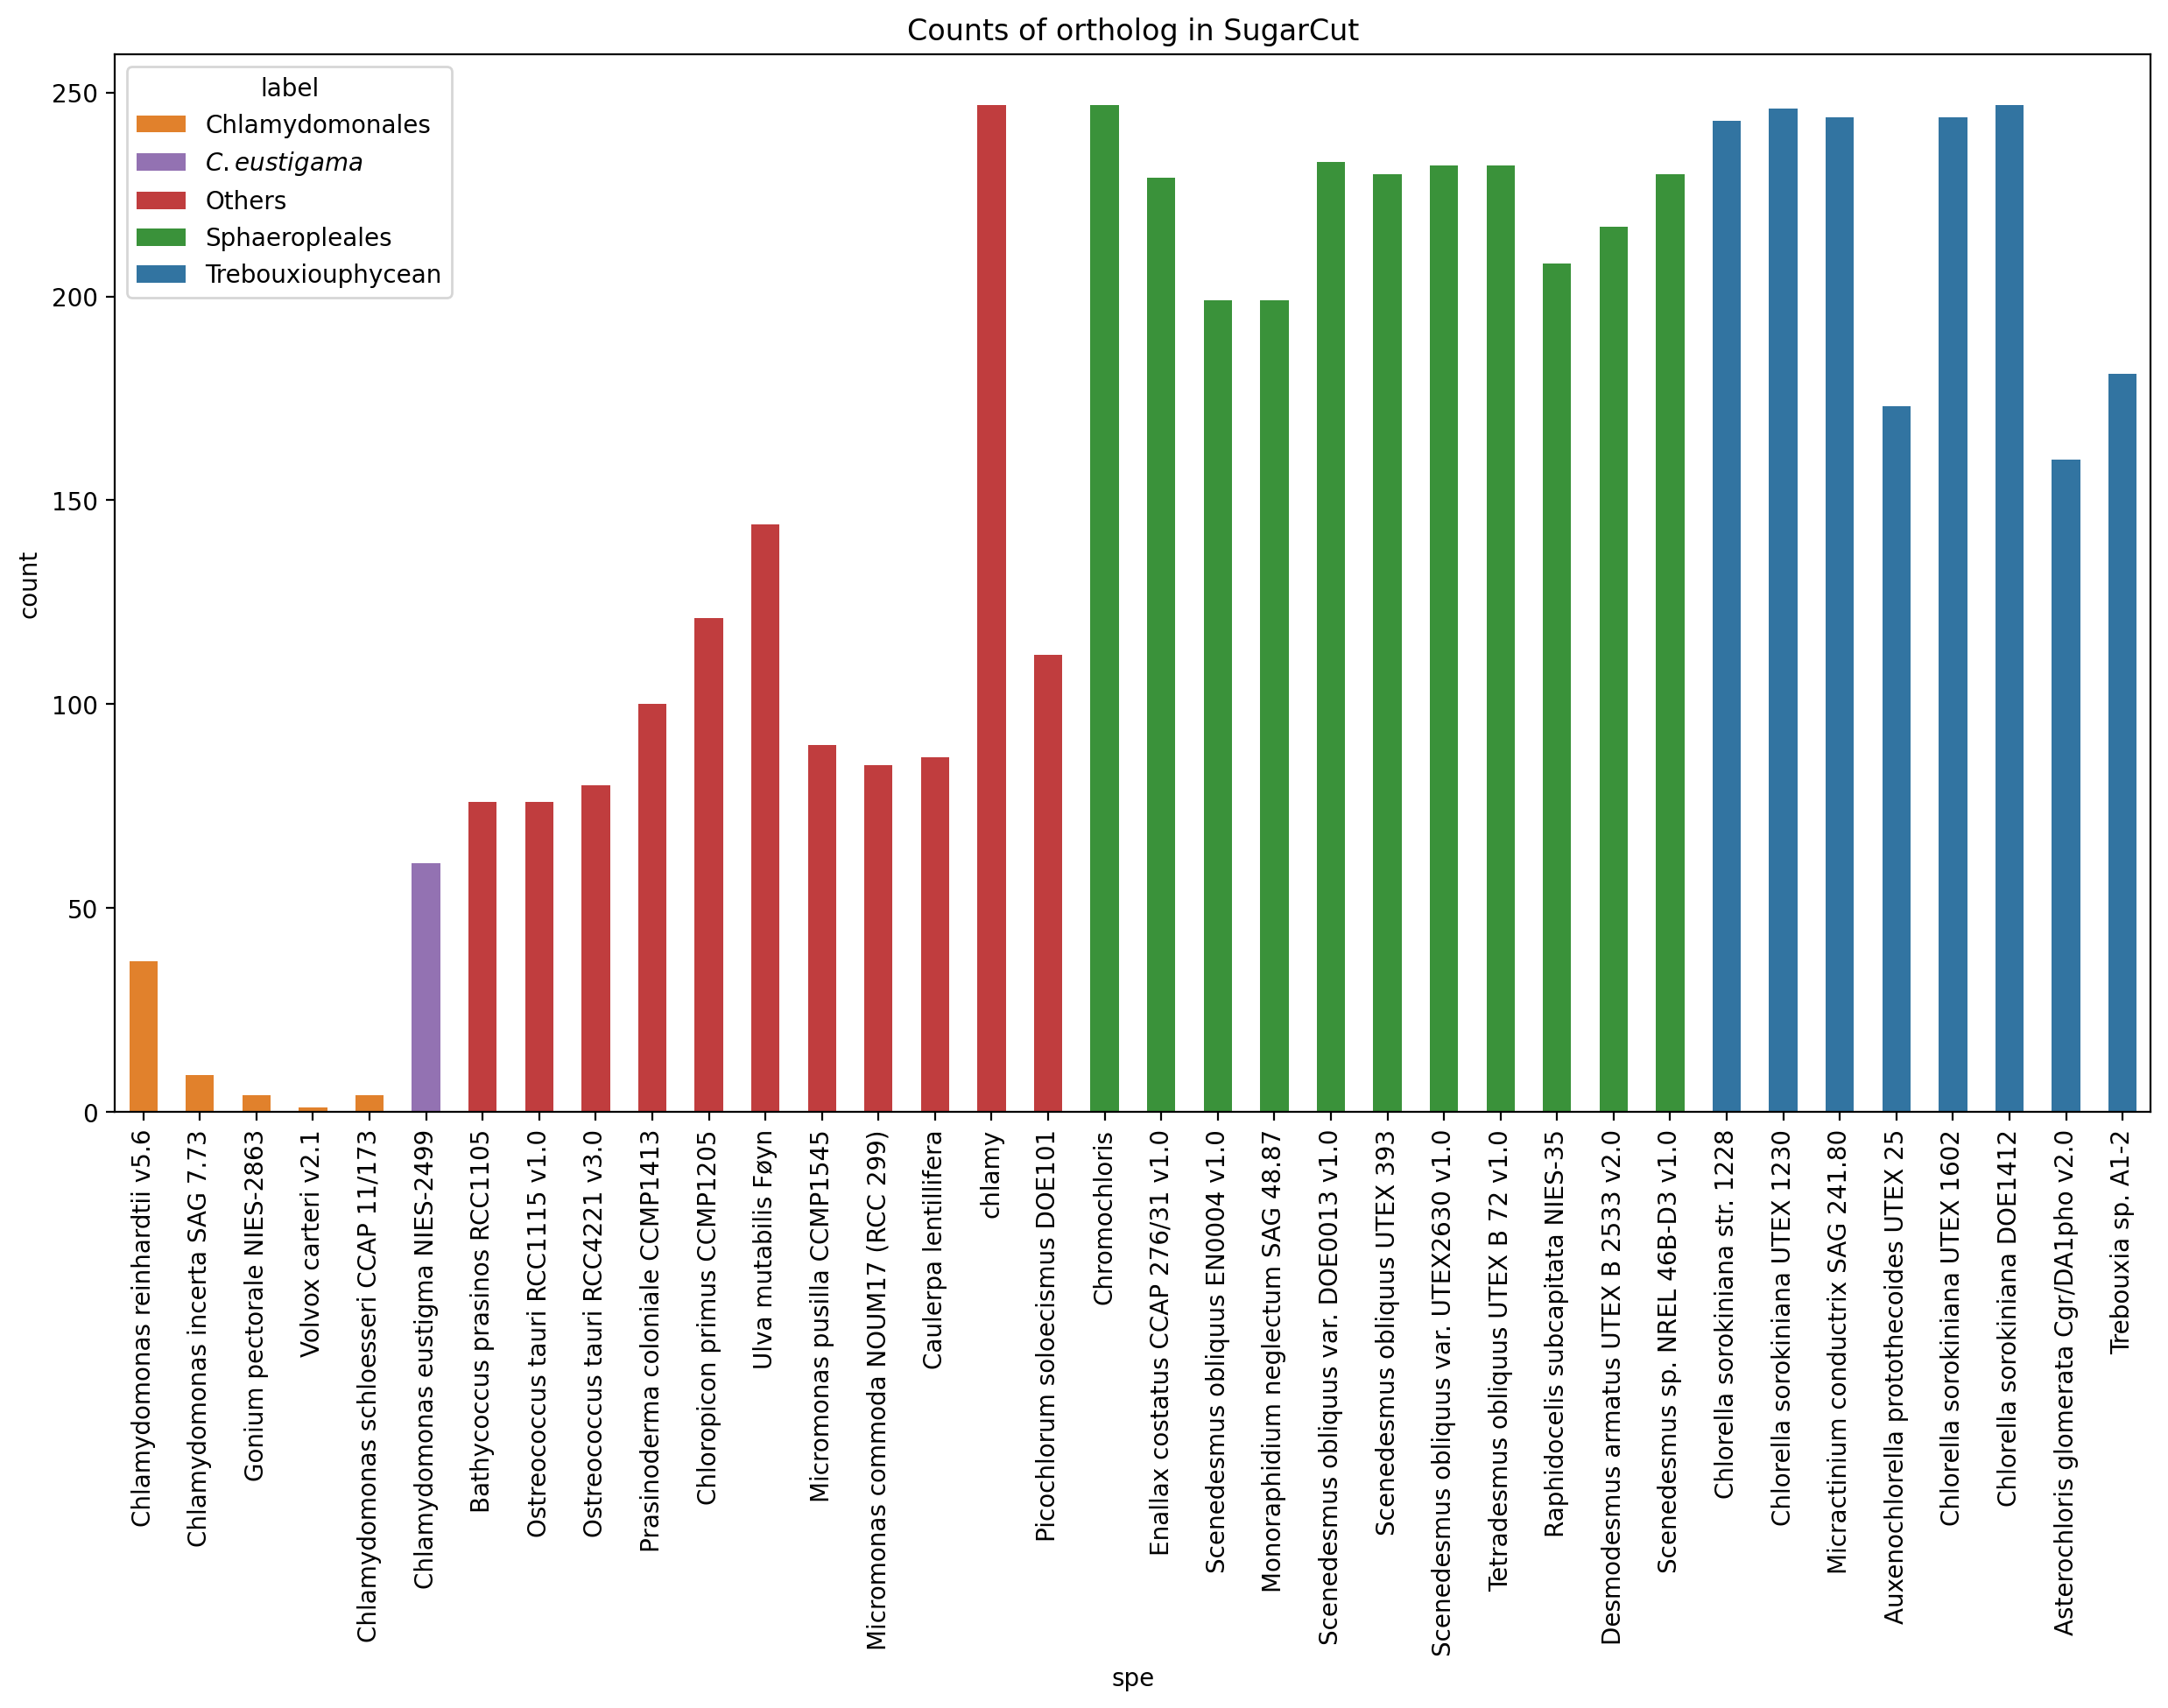

In [122]:
palette_bar = {'Chlamydomonales': palette[1], 'Trebouxiouphycean': palette[0], 'Others': palette[3], 'Sphaeropleales': palette[2], '$\it{C.eustigama}$': palette[4]}
fig, ax = plt.subplots(figsize=(15,8), dpi= 200, facecolor='w', edgecolor='k')
ax = sns.barplot(x='spe', y='count', hue = 'label', data=hits_df, palette = palette_bar, dodge=False)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .5)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.title('Counts of ortholog in SugarCut')
plt.savefig('su_counts.png', bbox_inches='tight')

In [123]:
hits_sph = {}
for i in sph.columns.tolist()[1:]:
    hits_sph[i] = sum(sph[i].apply(lambda x: x > -0.5))

In [124]:
hits_df = pd.DataFrame()
hits_df['spe'] = hits_sph.keys()
hits_df['count'] = hits_sph.values()
labels = []
for i in hits_df['spe'].tolist():
    if i in sphaeropleales:
        labels.append('sphaeropleales')
    elif i in Chlamydomonales:
        labels.append('Chlamydomonales')
    elif i in Trebouxiouphycean:
        labels.append('Trebouxiouphycean')
    else:
        labels.append('Others')
hits_df['label'] = labels
eu_hits = sum(whole[whole['Gene'].isin(sph['Gene'])]['Chlamydomonas eustigma NIES-2499'].apply(lambda x: x > -0.5))
hits_df.loc[len(hits_df.index)] = ['Chlamydomonas eustigma NIES-2499', eu_hits, 'Chlamydomonous_Eustigma'] 
hits_df = hits_df.sort_values(by='label', ascending=True)
hits_df

,spe,count,label
4,Volvox carteri v2.1,3,Chlamydomonales
8,Gonium pectorale NIES-2863,1,Chlamydomonales
13,Chlamydomonas schloesseri CCAP 11/173,1,Chlamydomonales
14,Chlamydomonas incerta SAG 7.73,3,Chlamydomonales
15,Chlamydomonas reinhardtii v5.6,20,Chlamydomonales
36,Chlamydomonas eustigma NIES-2499,26,Chlamydomonous_Eustigma
34,Bathycoccus prasinos RCC1105,0,Others
33,Ostreococcus tauri RCC1115 v1.0,0,Others
32,Ostreococcus tauri RCC4221 v3.0,0,Others
31,Prasinoderma coloniale CCMP1413,0,Others


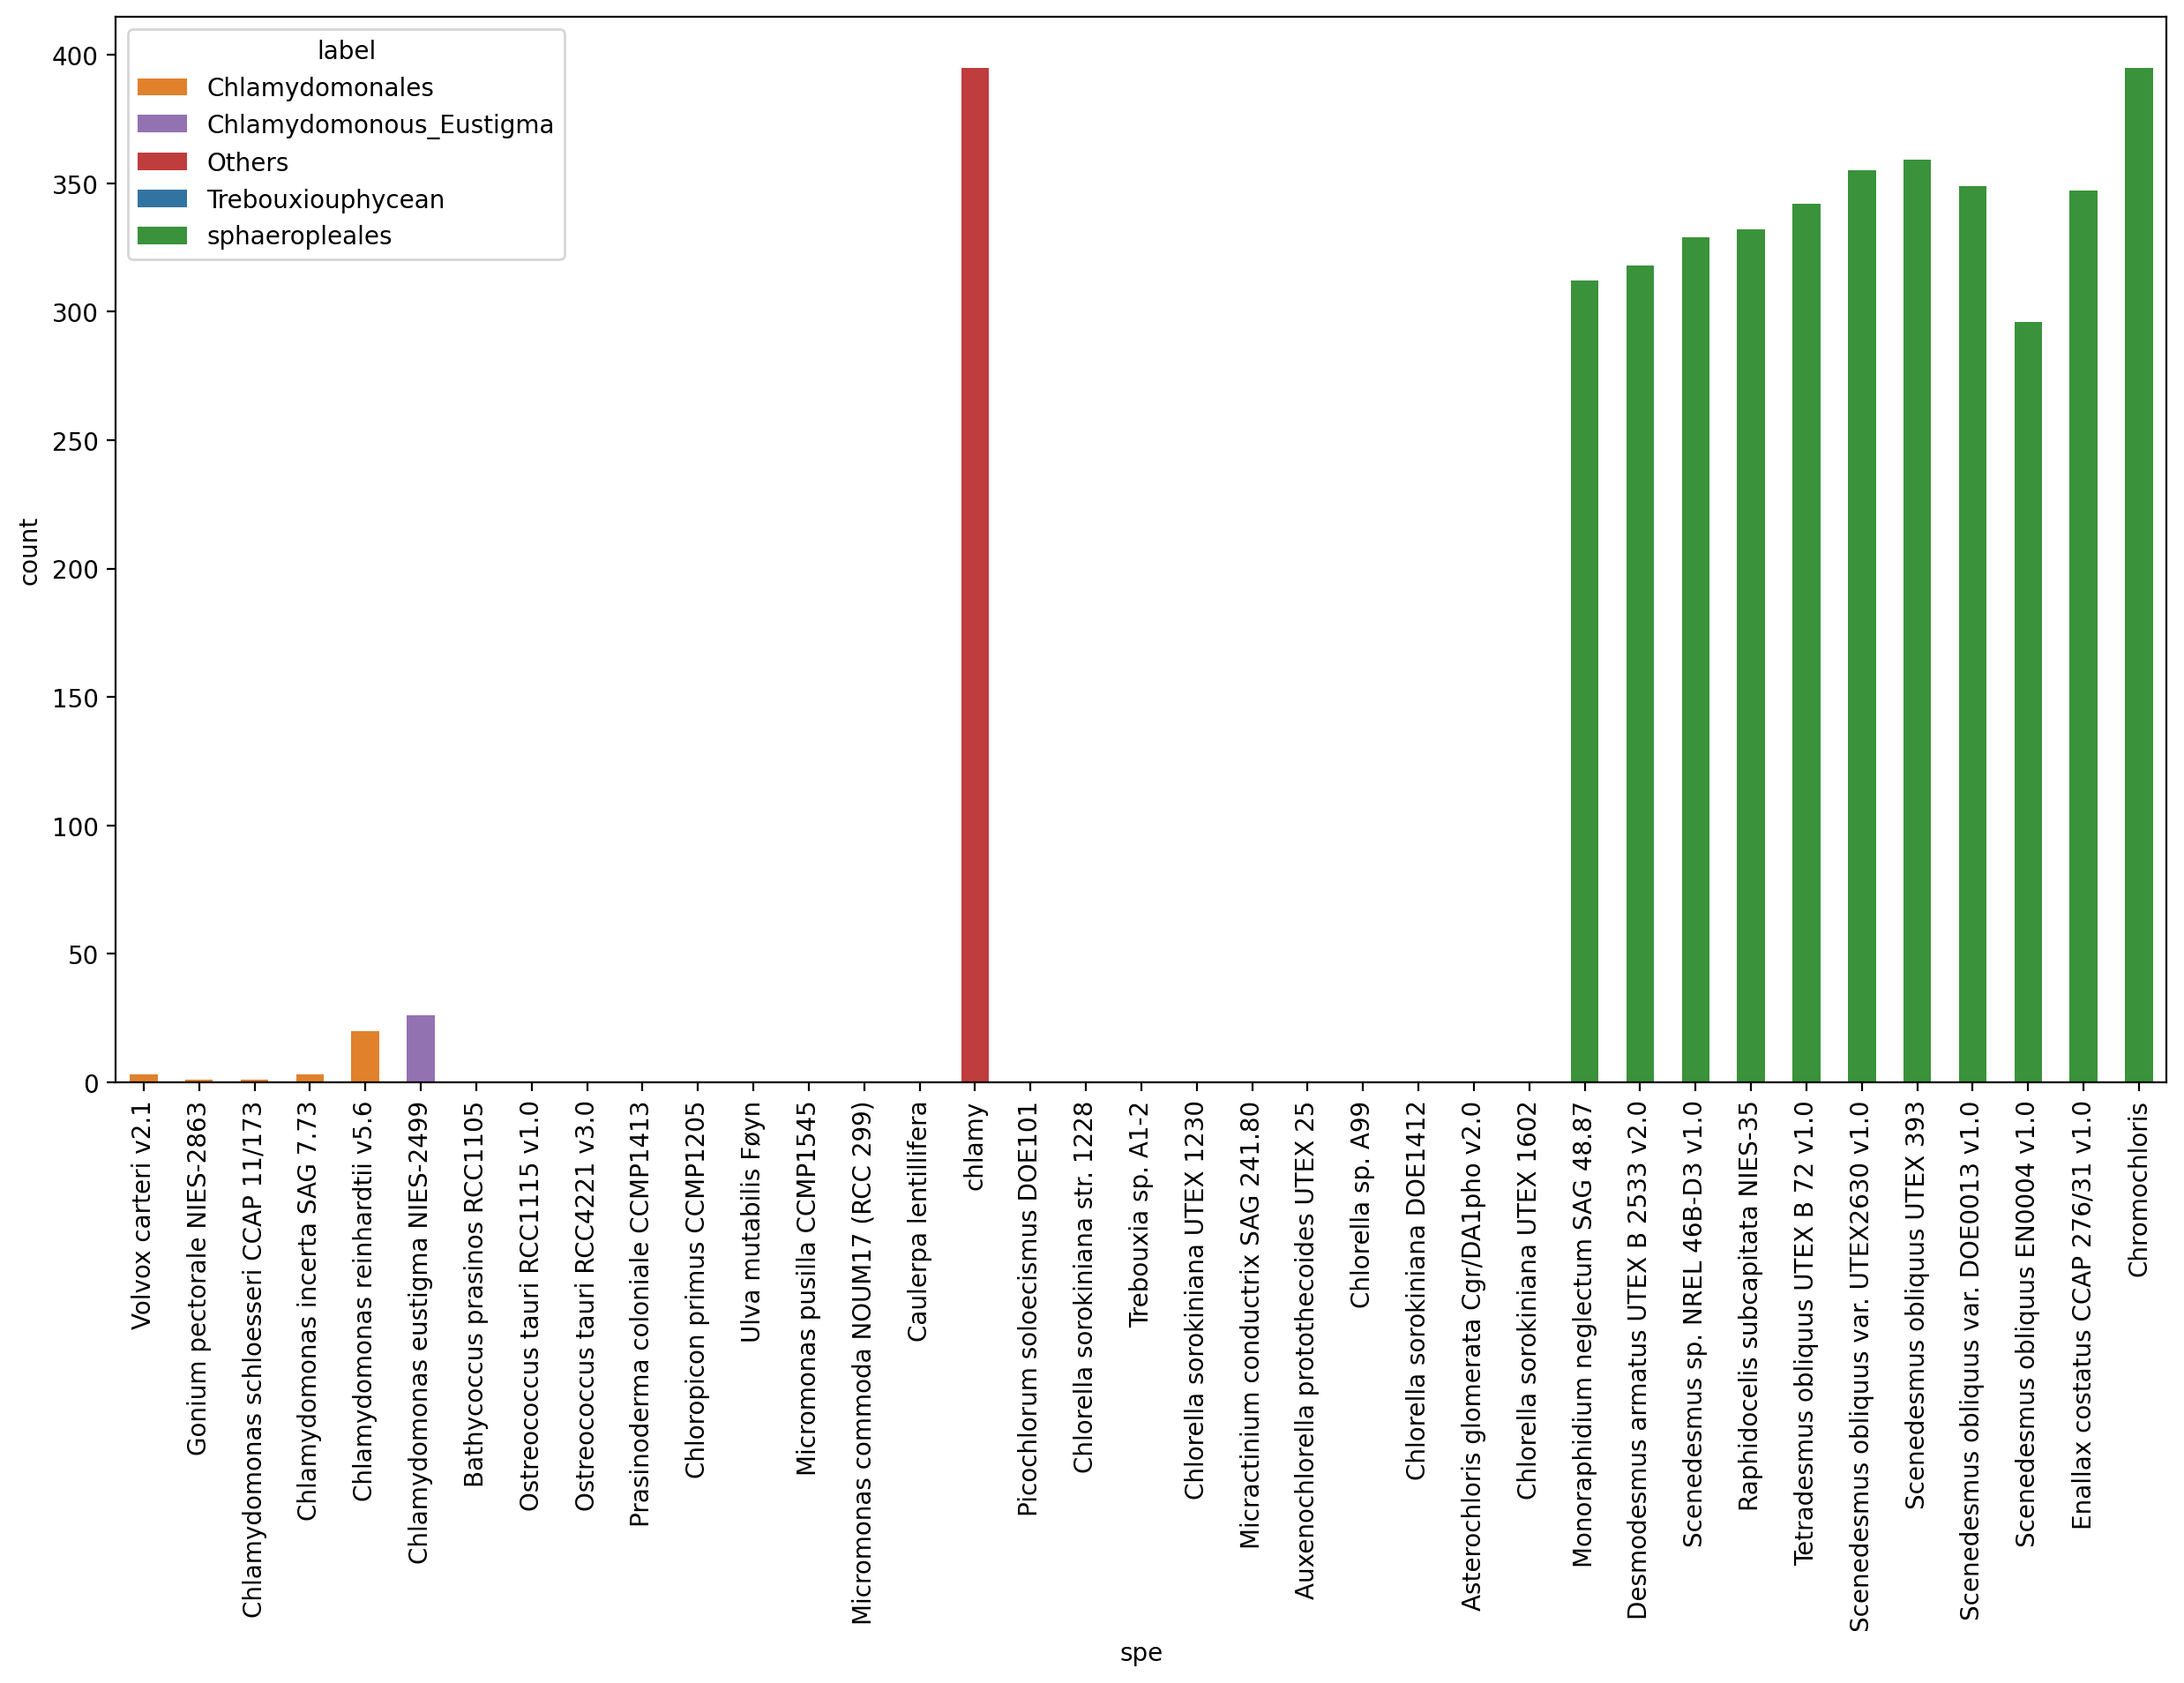

In [125]:
palette_bar = {'Chlamydomonales': palette[1], 'Trebouxiouphycean': palette[0], 'Others': palette[3], 'sphaeropleales': palette[2], 'Chlamydomonous_Eustigma': palette[4]}
fig, ax = plt.subplots(figsize=(15,8), dpi= 200, facecolor='w', edgecolor='k')
ax = sns.barplot(x='spe', y='count', hue = 'label', data=hits_df, palette = palette_bar, dodge=False)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .5)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [126]:
hits_ch_ab = {}
for i in ch_ab.columns.tolist()[1:]:
    hits_ch_ab[i] = sum(ch_ab[i].apply(lambda x: x > -0.5))
hits_df = pd.DataFrame()
hits_df['spe'] = hits_ch_ab.keys()
hits_df['count'] = hits_ch_ab.values()
labels = []
for i in hits_df['spe'].tolist():
    if i in sphaeropleales:
        labels.append('sphaeropleales')
    elif i in Chlamydomonales:
        labels.append('Chlamydomonales')
    elif i in Trebouxiouphycean:
        labels.append('Trebouxiouphycean')
    else:
        labels.append('Others')
hits_df['label'] = labels
eu_hits = sum(whole[whole['Gene'].isin(ch_ab['Gene'])]['Chlamydomonas eustigma NIES-2499'].apply(lambda x: x > -0.5))
hits_df.loc[len(hits_df.index)] = ['Chlamydomonas eustigma NIES-2499', eu_hits, 'Chlamydomonous_Eustigma'] 
hits_df = hits_df.sort_values(by='label', ascending=True)
hits_df

,spe,count,label
4,Volvox carteri v2.1,2,Chlamydomonales
8,Gonium pectorale NIES-2863,1,Chlamydomonales
13,Chlamydomonas schloesseri CCAP 11/173,2,Chlamydomonales
14,Chlamydomonas incerta SAG 7.73,5,Chlamydomonales
15,Chlamydomonas reinhardtii v5.6,41,Chlamydomonales
36,Chlamydomonas eustigma NIES-2499,51,Chlamydomonous_Eustigma
34,Bathycoccus prasinos RCC1105,189,Others
33,Ostreococcus tauri RCC1115 v1.0,195,Others
32,Ostreococcus tauri RCC4221 v3.0,197,Others
31,Prasinoderma coloniale CCMP1413,179,Others


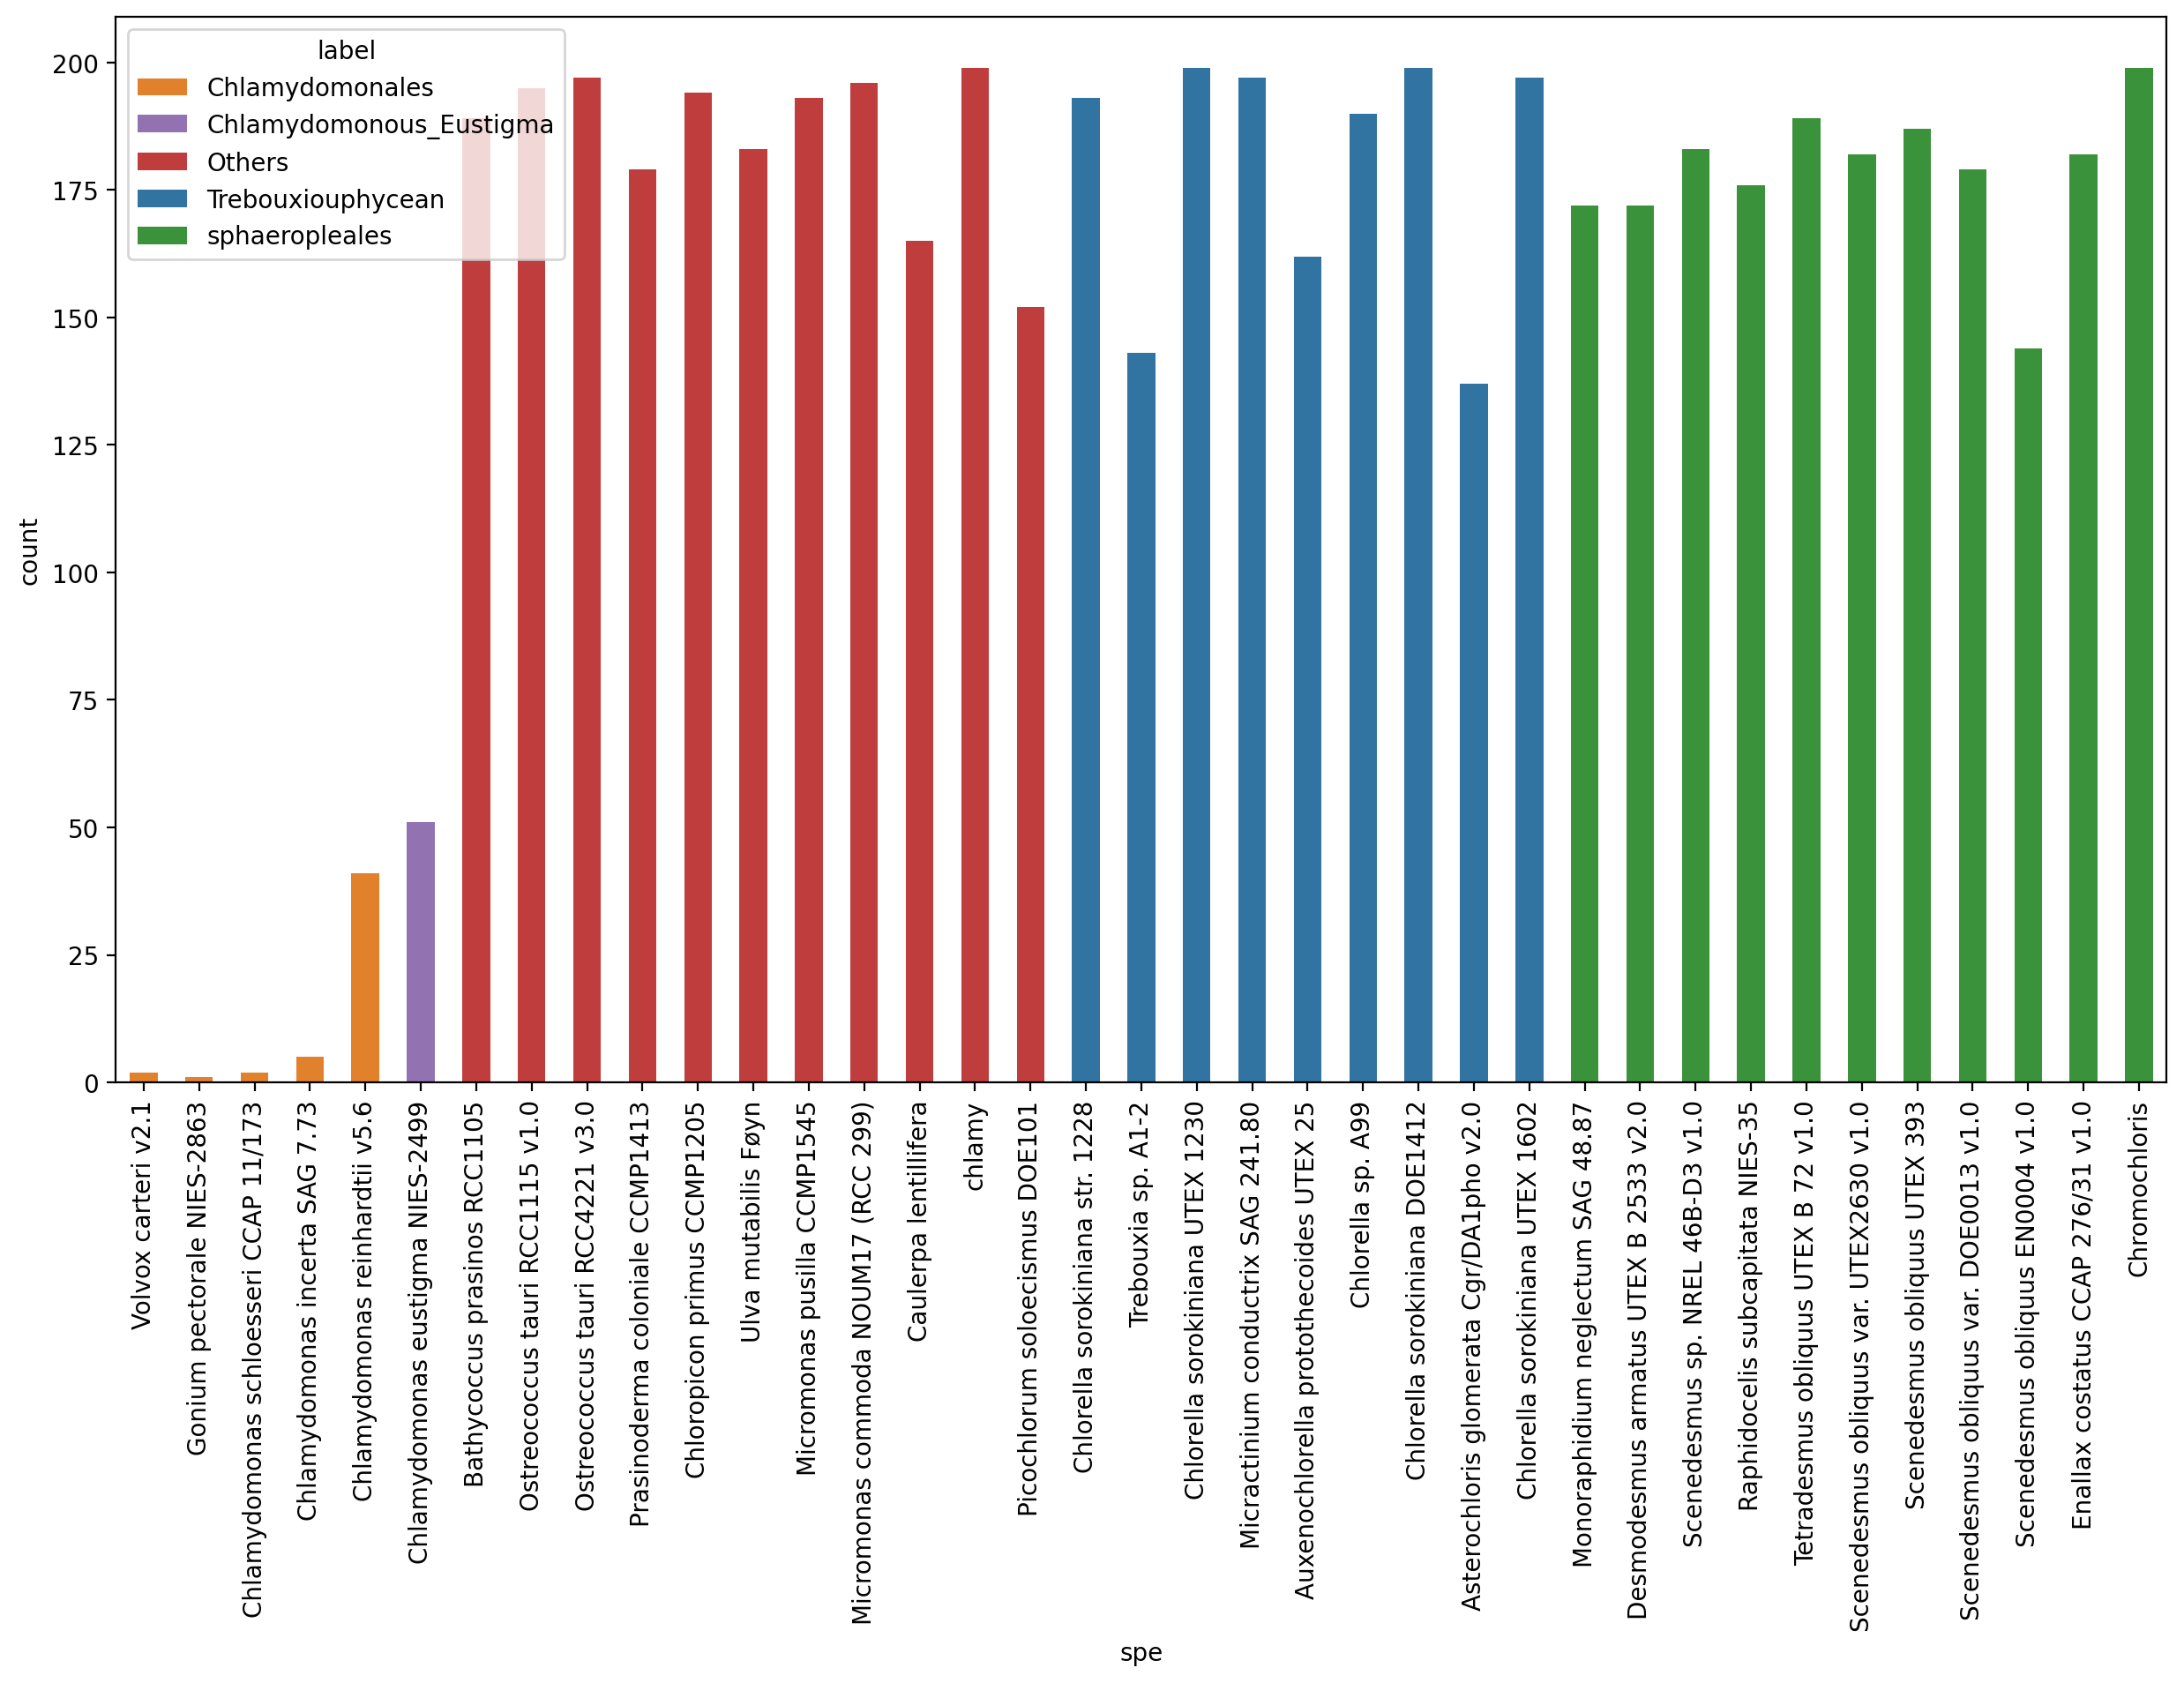

In [127]:
palette_bar = {'Chlamydomonales': palette[1], 'Trebouxiouphycean': palette[0], 'Others': palette[3], 'sphaeropleales': palette[2], 'Chlamydomonous_Eustigma': palette[4]}
fig, ax = plt.subplots(figsize=(15,8), dpi= 200, facecolor='w', edgecolor='k')
ax = sns.barplot(x='spe', y='count', hue = 'label', data=hits_df, palette = palette_bar, dodge=False)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .5)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

In [128]:
### combination of sph, sugar, and chlamy_absent.
hits_all = {}
for i in su.columns.tolist()[1:]:
    hits_all[i] = sum(su[i].apply(lambda x: x > -0.5))
for i in sph.columns.tolist()[1:]:
    hits_all[i] += sum(sph[i].apply(lambda x: x > -0.5))
for i in ch_ab.columns.tolist()[1:]:
    hits_all[i] += sum(ch_ab[i].apply(lambda x: x > -0.5))
hits_df = pd.DataFrame()
hits_df['spe'] = hits_all.keys()
hits_df['count'] = hits_all.values()
labels = []
for i in hits_df['spe'].tolist():
    if i in sphaeropleales:
        labels.append('sphaeropleales')
    elif i in Chlamydomonales:
        labels.append('Chlamydomonales')
    elif i in Trebouxiouphycean:
        labels.append('Trebouxiouphycean')
    else:
        labels.append('Others')
hits_df['label'] = labels
eu_hits = sum(whole[whole['Gene'].isin(sph['Gene'])]['Chlamydomonas eustigma NIES-2499'].apply(lambda x: x > -0.5)) + sum(whole[whole['Gene'].isin(su['Gene'])]['Chlamydomonas eustigma NIES-2499'].apply(lambda x: x > -0.5)) +sum(whole[whole['Gene'].isin(ch_ab['Gene'])]['Chlamydomonas eustigma NIES-2499'].apply(lambda x: x > -0.5)) 
hits_df.loc[len(hits_df.index)] = ['Chlamydomonas eustigma NIES-2499', eu_hits, 'Chlamydomonous_Eustigma'] 
hits_df = hits_df.sort_values(by='label', ascending=True)
hits_df

,spe,count,label
4,Volvox carteri v2.1,6,Chlamydomonales
8,Gonium pectorale NIES-2863,6,Chlamydomonales
13,Chlamydomonas schloesseri CCAP 11/173,7,Chlamydomonales
14,Chlamydomonas incerta SAG 7.73,17,Chlamydomonales
15,Chlamydomonas reinhardtii v5.6,98,Chlamydomonales
36,Chlamydomonas eustigma NIES-2499,138,Chlamydomonous_Eustigma
34,Bathycoccus prasinos RCC1105,265,Others
33,Ostreococcus tauri RCC1115 v1.0,271,Others
32,Ostreococcus tauri RCC4221 v3.0,277,Others
31,Prasinoderma coloniale CCMP1413,279,Others


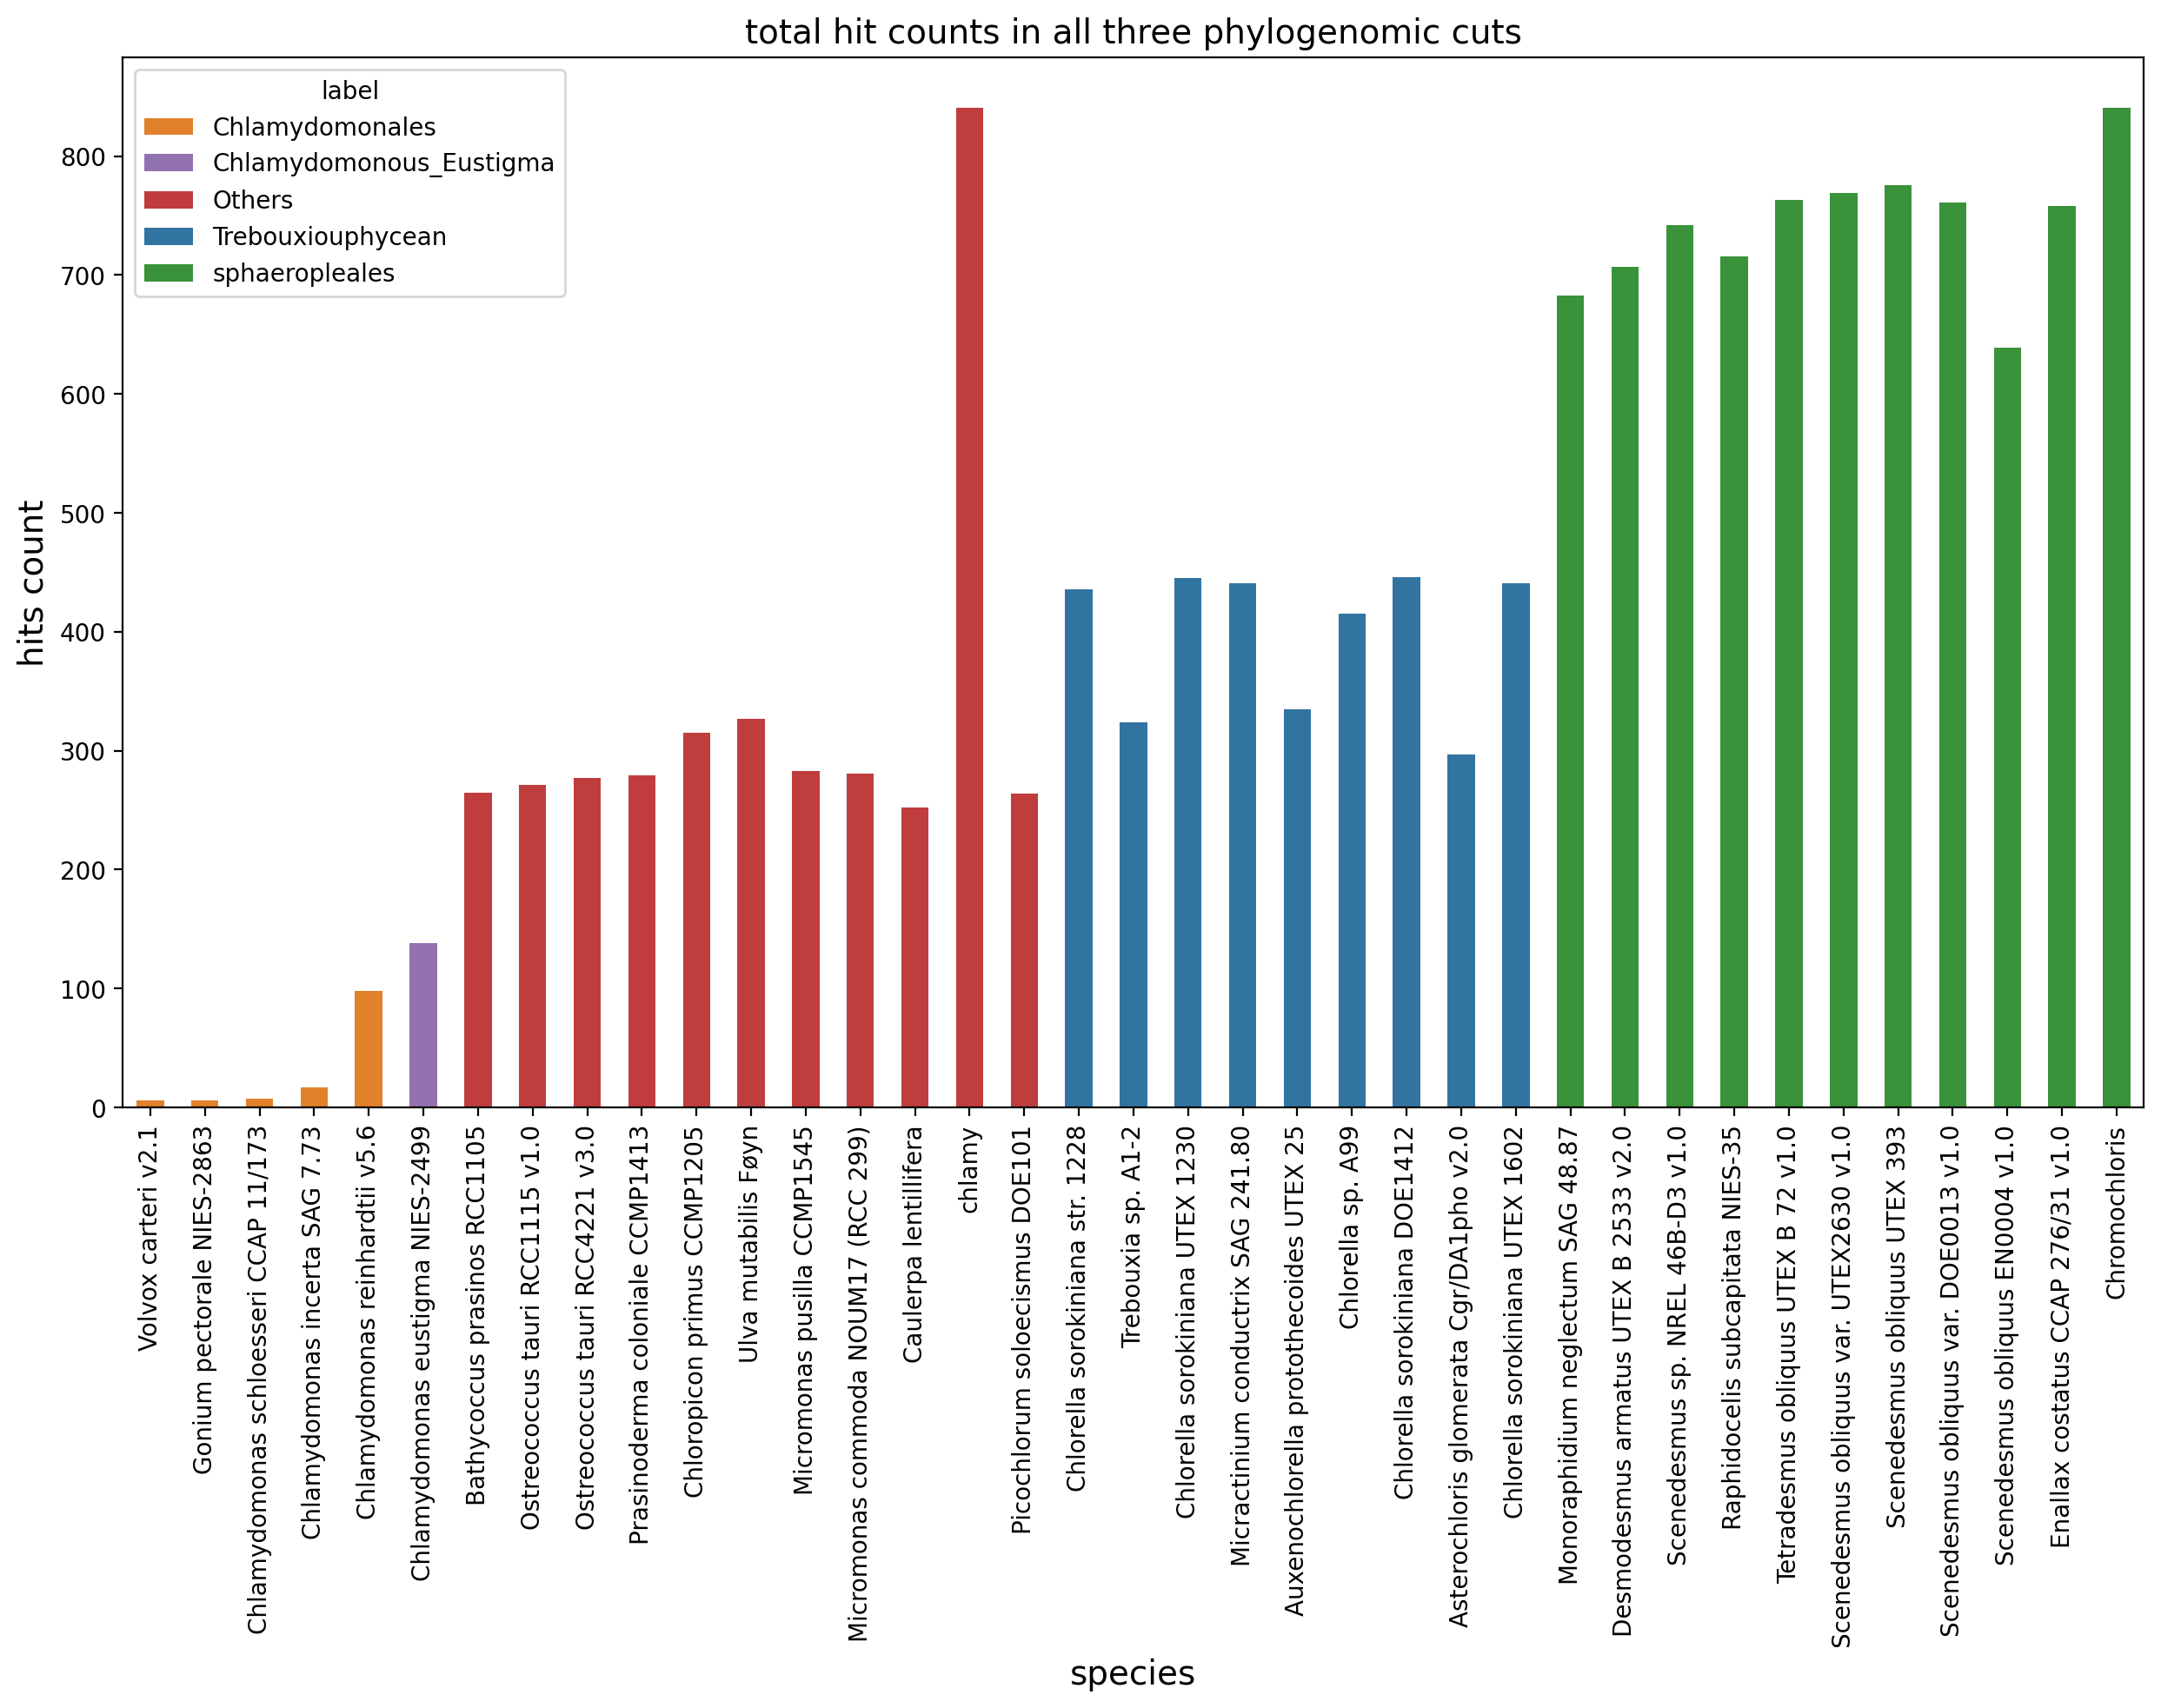

In [129]:
palette_bar = {'Chlamydomonales': palette[1], 'Trebouxiouphycean': palette[0], 'Others': palette[3], 'sphaeropleales': palette[2], 'Chlamydomonous_Eustigma': palette[4]}
fig, ax = plt.subplots(figsize=(15,8), dpi= 200, facecolor='w', edgecolor='k')
ax = sns.barplot(x='spe', y='count', hue = 'label', data=hits_df, palette = palette_bar, dodge=False)
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
change_width(ax, .5)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.title('total hit counts in all three phylogenomic cuts', fontsize=14);
plt.xlabel('species', fontsize=14)
plt.ylabel('hits count', fontsize=14)
plt.savefig('counts.png', bbox_inches='tight')

## Trancscriptome Analysis

In [130]:
fh = open("Cz.v5.3.5.peptide.fa")
n = 0
for line in fh:
    if line.startswith(">"):
        n += 1
fh.close()
n

15572

In [131]:
np.log2(2)

1.0

In [132]:
### different color scheme for transcriptomes
transcripts = pd.read_csv('/Users/lucytian/Desktop/honors thesis/glucose transporter/Roth_TranscriptAbundance.csv', sep = ',')
transcripts

,geneID,noGlc_0h,Glc_0h,noGlc_0.5h,noGlc_1h,noGlc_3h,noGlc_6h,noGlc_12h,Glc_0.5h,Glc_1h,...,GlcGlc_0.5h,GlcGlc_1h,GlcGlc_3h,GlcGlc_6h,GlcGlc_12h,GlcRemoval_0.5h,GlcRemoval_1h,GlcRemoval_3h,GlcRemoval_6h,GlcRemoval_12h
0,Cz01g00020,30.6,30.6,30.5,32.2,30.4,18.4,19.2,24.0,17.4,...,17.9,24.9,46.9,28.9,17.3,18.5,26.0,39.2,29.9,25.4
1,Cz01g00030,38.9,38.9,64.4,70.8,68.6,50.1,56.9,49.6,50.9,...,81.9,104.3,183.6,90.0,113.7,102.9,124.6,139.5,88.5,82.4
2,Cz01g00040,2.5,2.5,2.9,2.8,3.9,5.9,5.9,2.9,2.7,...,0.7,0.5,2.4,1.3,2.1,0.5,0.7,2.4,2.9,5.0
3,Cz01g00050,2.4,2.4,2.4,2.8,4.1,5.5,6.8,2.4,2.8,...,0.6,1.1,3.1,2.0,2.5,0.4,0.8,3.0,3.8,7.0
4,Cz01g00060,10.4,10.4,8.9,9.1,8.2,12.0,12.5,10.9,13.0,...,12.6,11.8,8.7,12.6,11.3,10.0,9.7,12.0,13.9,8.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15364,UNPLg00026,46.8,46.8,40.3,41.2,45.6,44.4,57.7,222.2,182.2,...,74.7,54.4,55.2,113.1,69.6,44.6,53.7,49.5,62.7,49.9
15365,UNPLg00027,7.0,7.0,10.1,11.5,8.9,10.6,16.4,63.1,66.0,...,28.5,20.7,21.0,39.8,28.8,21.6,15.9,13.1,13.1,12.3
15366,UNPLg00028,0.0,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.6,...,2.6,1.2,1.3,1.5,1.1,1.8,0.7,0.2,0.0,0.4
15367,UNPLg00029,83.6,83.6,80.5,72.7,87.5,10.8,0.7,71.9,60.9,...,28.0,47.5,115.0,98.6,38.7,54.4,48.3,119.8,103.6,22.7


In [133]:
no_Glc_col = []
Glc_col = []
GlcGlc_col = []
GlcRe_col = []
for i in transcripts.columns.tolist():
    if 'noGlc' in i:
        no_Glc_col.append(i)
    elif re.match(r'^Glc_', i):
        Glc_col.append(i)
    elif 'GlcGlc' in i:
        GlcGlc_col.append(i)
    elif 'GlcRe' in i:
        GlcRe_col.append(i)

In [134]:
no_Glc_tr = transcripts[['geneID'] + no_Glc_col]
Glc_tr = transcripts[['geneID'] + Glc_col]
GlcGlc_tr = transcripts[['geneID'] + GlcGlc_col]
GlcRe_tr = transcripts[['geneID'] + GlcRe_col]

In [135]:
# Glc = log2(Glc/noGlc), GlcRemoval= log2(GlcRemoval/GlcGlc)) %>% select(-GlcGlc,-noGlc
tr_su = transcripts[transcripts['geneID'].isin([i[:-3] for i in su['Gene'].tolist()])]
no_Glc = [col for col in tr_su.columns if 'noGlc' in col]
Glc = [col for col in tr_su.columns if re.match(r'^Glc_', col)]
GlcGlc = [col for col in tr_su.columns if 'GlcGlc' in col]
GlcRe = [col for col in tr_su.columns if 'GlcRe' in col]
no_Glc_df = tr_su[['geneID'] + no_Glc]
Glc_df = tr_su[['geneID'] + Glc]
GlcGlc_df = tr_su[['geneID'] + GlcGlc]
GlcRe_df = tr_su[['geneID'] + GlcRe]

In [136]:
Glc_tr

,geneID,Glc_0h,Glc_0.5h,Glc_1h,Glc_3h,Glc_6h,Glc_12h
0,Cz01g00020,30.6,24.0,17.4,19.4,22.8,22.0
1,Cz01g00030,38.9,49.6,50.9,79.1,97.4,91.4
2,Cz01g00040,2.5,2.9,2.7,0.9,1.2,1.9
3,Cz01g00050,2.4,2.4,2.8,0.7,1.6,1.9
4,Cz01g00060,10.4,10.9,13.0,7.2,4.5,10.1
...,...,...,...,...,...,...,...
15364,UNPLg00026,46.8,222.2,182.2,95.0,89.3,110.6
15365,UNPLg00027,7.0,63.1,66.0,29.7,33.1,34.7
15366,UNPLg00028,0.0,0.0,0.6,1.8,2.5,2.6
15367,UNPLg00029,83.6,71.9,60.9,49.3,32.6,5.9


In [137]:
no_Glc_tr

,geneID,noGlc_0h,noGlc_0.5h,noGlc_1h,noGlc_3h,noGlc_6h,noGlc_12h
0,Cz01g00020,30.6,30.5,32.2,30.4,18.4,19.2
1,Cz01g00030,38.9,64.4,70.8,68.6,50.1,56.9
2,Cz01g00040,2.5,2.9,2.8,3.9,5.9,5.9
3,Cz01g00050,2.4,2.4,2.8,4.1,5.5,6.8
4,Cz01g00060,10.4,8.9,9.1,8.2,12.0,12.5
...,...,...,...,...,...,...,...
15364,UNPLg00026,46.8,40.3,41.2,45.6,44.4,57.7
15365,UNPLg00027,7.0,10.1,11.5,8.9,10.6,16.4
15366,UNPLg00028,0.0,0.0,0.2,0.0,0.2,0.0
15367,UNPLg00029,83.6,80.5,72.7,87.5,10.8,0.7


In [138]:
np.log2(1.42)

0.5058909297299573

In [139]:
99/247

0.4008097165991903

In [140]:
4979/15572

0.3197405599794503

In [141]:
log_df = pd.DataFrame()
log_Glc = []
log_GlcRemoval = []
for i in np.arange(1, len(Glc_tr.columns)):
    log_Glc.append(np.log2((Glc_tr.iloc[:, i]+1) / (no_Glc_tr.iloc[:, i]+1)))
    log_GlcRemoval.append(np.log2((GlcRe_tr.iloc[:, i]+1) / (GlcGlc_tr.iloc[:, i]+1)))
log_df['geneID'] = transcripts['geneID'].tolist()
time = [0, 0.5, 1, 3, 6, 12]
for i in np.arange(len(time)):
    log_df['Glc_'+str(time[i])+'h'] = log_Glc[i].tolist()
    log_df['GlcRemoval_'+str(time[i])+'h'] = log_GlcRemoval[i].tolist()
list_glu = log_df[(abs(log_df['Glc_3h']) >= 1) | (abs(log_df['Glc_6h']) >= 1) | (abs(log_df['Glc_12h']) >= 1)]['geneID'].to_list()
len(list_glu)

4979

In [142]:
su_gene = []
for i in su['Gene'].tolist():
    su_gene.append(i[:-3])

In [143]:
sum([i in list_glu for i in su_gene])

99

In [144]:
log_df = pd.DataFrame()
log_Glc = []
log_GlcRemoval = []
for i in np.arange(1, len(Glc_df.columns)):
    log_Glc.append(np.log2((Glc_df.iloc[:, i]+1) / (no_Glc_df.iloc[:, i]+1)))
    log_GlcRemoval.append(np.log2((GlcRe_df.iloc[:, i]+1) / (GlcGlc_df.iloc[:, i]+1)))
log_df['geneID'] = tr_su['geneID'].tolist()
time = [0, 0.5, 1, 3, 6, 12]
for i in np.arange(len(time)):
    log_df['Glc_'+str(time[i])+'h'] = log_Glc[i].tolist()
    log_df['GlcRemoval_'+str(time[i])+'h'] = log_GlcRemoval[i].tolist()
log_df[['geneID'] + [col for col in log_df.columns if re.match(r'^Glc_', col)]]

,geneID,Glc_0h,Glc_0.5h,Glc_1h,Glc_3h,Glc_6h,Glc_12h
0,Cz01g00310,0.0,0.374396,0.314343,0.715857,0.941583,0.000000
1,Cz01g05110,0.0,-0.277228,-0.171112,-0.572138,-0.247928,-0.692620
2,Cz01g08030,0.0,0.647698,0.654109,-0.332983,-0.374396,-0.229482
3,Cz01g08130,0.0,0.125531,0.000000,-0.263034,-0.447459,0.222392
4,Cz01g09110,0.0,-0.407175,-0.320750,-0.523831,-0.548204,-0.598902
...,...,...,...,...,...,...,...
231,UNPLg00211,0.0,-0.278716,-0.697073,-0.935149,-0.711755,-0.351074
232,UNPLg00214,0.0,-0.359081,-0.623437,-1.297681,-2.294183,-2.159657
233,UNPLg00151,0.0,0.000000,0.000000,0.485427,0.000000,0.000000
234,UNPLg00122,0.0,0.364904,0.055041,-0.859993,-1.678072,-0.662462


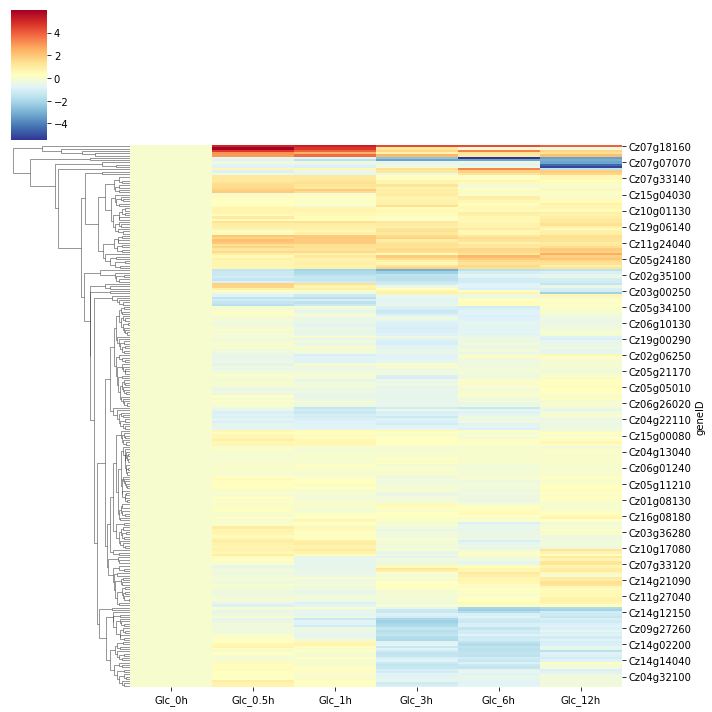

In [145]:
sns.clustermap(log_df[['geneID'] + [col for col in log_df.columns if re.match(r'^Glc_', col)]].set_index('geneID'), cmap="RdYlBu_r", col_cluster=False)

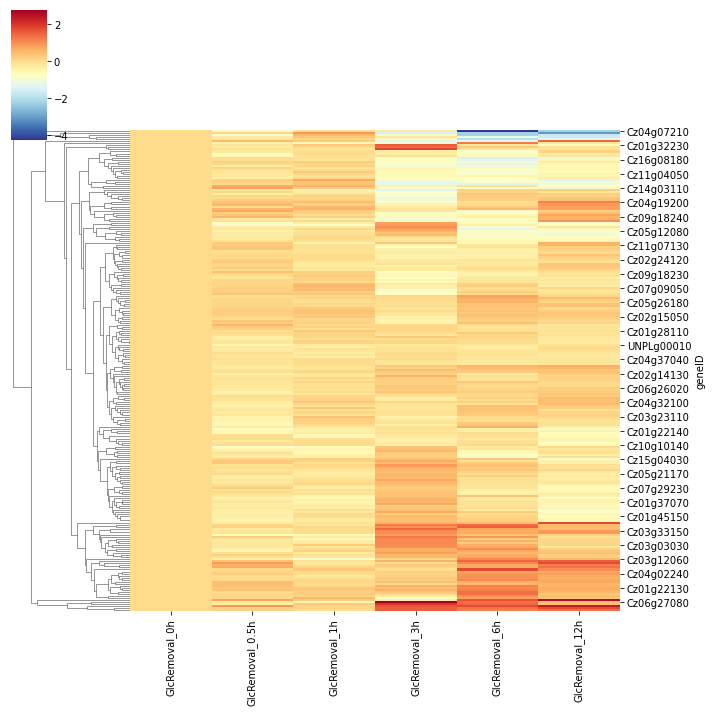

In [146]:
sns.clustermap(log_df[['geneID'] + [col for col in log_df.columns if re.match(r'^GlcRemoval_', col)]].set_index('geneID'), cmap="RdYlBu_r", col_cluster=False)

<AxesSubplot:ylabel='geneID'>

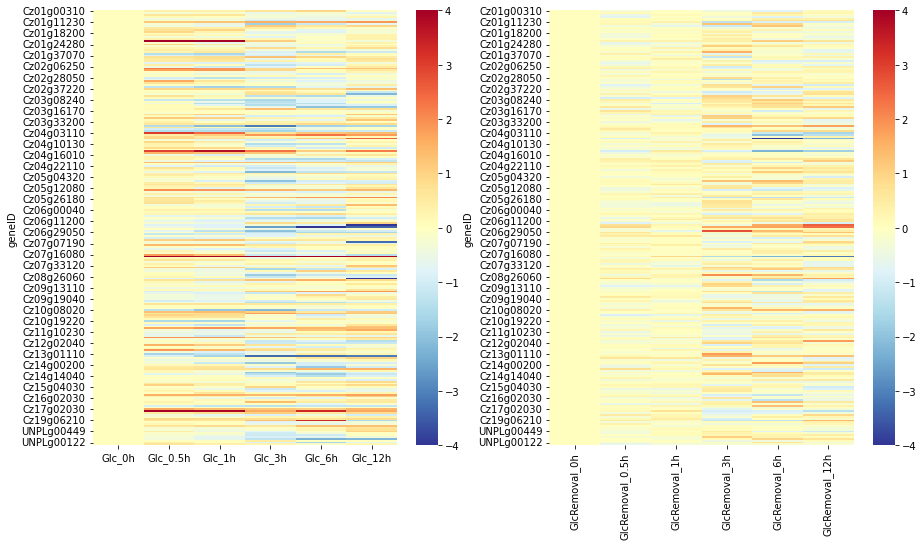

In [147]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,8))
sns.heatmap(log_df[['geneID'] + [col for col in log_df.columns if re.match(r'^Glc_', col)]].set_index('geneID'), vmin=-4, vmax=4, ax=ax1, cmap="RdYlBu_r")
sns.heatmap(log_df[['geneID'] + [col for col in log_df.columns if re.match(r'^GlcRemoval_', col)]].set_index('geneID'), vmin=-4, vmax=4, ax=ax2, cmap="RdYlBu_r")

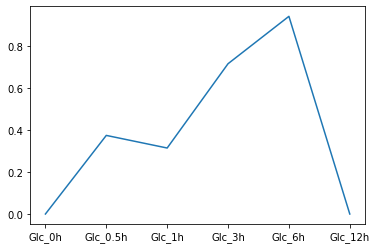

In [148]:
## Cz01g00310
plt.plot(log_df[['geneID'] + [col for col in log_df.columns if re.match(r'^Glc_', col)]].columns.tolist()[1:], log_df[['geneID'] + [col for col in log_df.columns if re.match(r'^Glc_', col)]].iloc[0].tolist()[1:]);

In [149]:
def plot_trend(df, name):
    plt.plot(df.columns.tolist()[1:], df[df['geneID'] == name].iloc[0].tolist()[1:]);

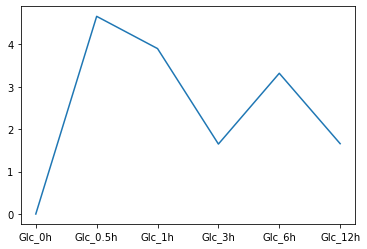

In [150]:
plot_trend(log_df[['geneID'] + [col for col in log_df.columns if re.match(r'^Glc_', col)]], 'Cz17g03120')

In [151]:
cz_07_pre = bitscore_predicted[bitscore_predicted['Gene']=='Cz07g18160.t1'].values.tolist()[0][1:]
cz_07_a_ch = bitscore_actual[['ortholog'] + Chlamydomonales[1:]][bitscore_actual[['ortholog'] + Chlamydomonales[1:]]['ortholog']=='Cz07g18160.t1'].values.tolist()[0][1:]
species = bitscore_predicted.columns.tolist()[1:]

In [152]:
parameters = pd.read_csv('abSENSE_results_09.13.2021_22.25/Parameter_values', sep = '\t', comment = "#")
parameters = parameters.rename(columns={"a":'L', 'b': 'R'})
parameters

,Gene,L,R
0,Cz01g00020.t1,1884.7611141653283,0.8985231713538397
1,Cz01g00030.t1,452.91889491534573,1.0835947553761212
2,Cz01g00035.t1,not_enough_data,not_enough_data
3,Cz01g00040.t1,4505.5314489718585,7.199442322534218
4,Cz01g00060.t1,653.8689167297031,5.578006894033623
...,...,...,...
14063,UNPLg01000.t1,not_enough_data,not_enough_data
14064,UNPLg01001.t1,not_enough_data,not_enough_data
14065,UNPLg01002.t1,not_enough_data,not_enough_data
14066,UNPLg01003.t1,not_enough_data,not_enough_data


In [153]:
cz07vals = parameters[parameters['Gene']=='Cz07g18160.t1'].values.tolist()[0]

In [154]:
t = np.arange(0, 0.8, 0.0001)
score = float(cz07vals[1]) * np.exp(-float(cz07vals[2]) * t)

NameError: name 'chlamy_index' is not defined

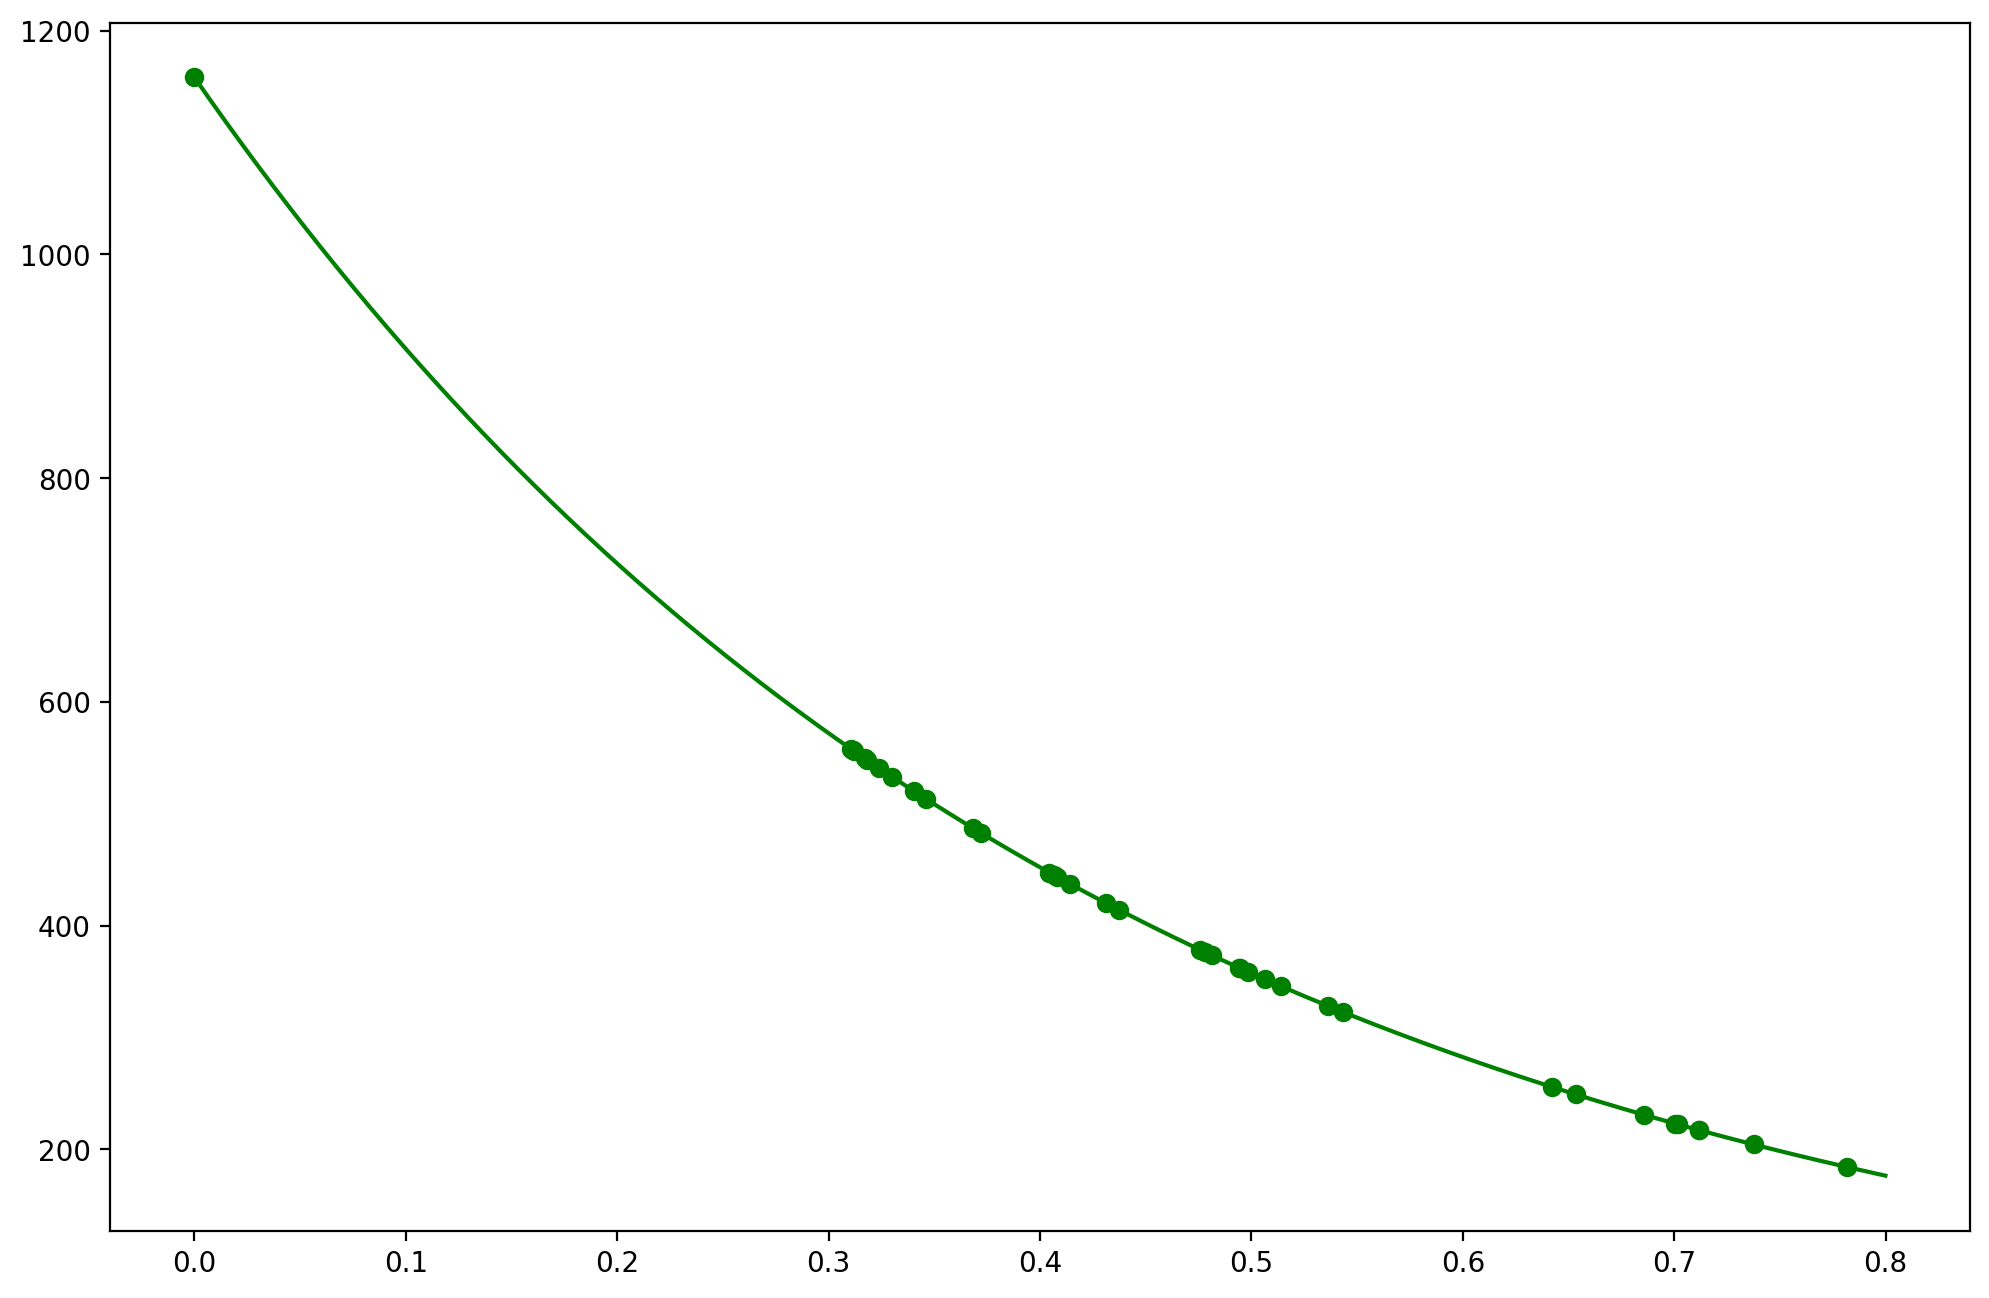

In [155]:
fig, ax = plt.subplots(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')
ax.plot(t, score, color='green')
ax.scatter(dist_df['Dist'].tolist(), cz_07_pre, color='green', label='predicted bit score')
ax.scatter(dist_df.iloc[chlamy_index, :]['Dist'].tolist(), cz_07_a_ch, color='red', label='actual bit score')
ax.scatter(eustigama_dist, bitscore_actual[bitscore_actual['ortholog']=='Cz07g18160.t1'][['ortholog', 'Chlamydomonas eustigma NIES-2499']].values.tolist()[0][1], color='purple', label="$\it{C.eustigama}$ actual score")
ax.set_xticks(dist_df.iloc[chlamy_index_eu, :]['Dist'].tolist())
ax.set_xticklabels(spe_label, rotation=90, fontsize=8);
plt.xlabel('evolutionary distance', fontsize=14)
plt.ylabel('homology score', fontsize=14)
plt.title('HUP-like gene Cz07g18160.t1', fontsize=14)
plt.legend();

plt.savefig('07.png', bbox_inches='tight')

In [ ]:
len(dist_df['Dist'].tolist())

In [ ]:
len(cz_07_pre)

In [ ]:
chlamy_index = dist_df[dist_df['SpeciesName'].isin(Chlamydomonales)].index.tolist()
chlamy_index_eu = [4, 8, 9, 14, 15, 16]

In [156]:
eustigama_dist = dist_df[dist_df['SpeciesName'] == 'Chlamydomonas eustigma NIES-2499']['Dist'].tolist()

In [157]:
bitscore_actual[bitscore_actual['ortholog']=='Cz07g18160.t1'][['ortholog', 'Chlamydomonas eustigma NIES-2499']].values.tolist()[0][1]

536.0

In [ ]:
Chlamydomonales

In [ ]:
spe_label = ['Volca2', 'Gonpec1', 'Chleu1', 'Chlsc1', 'Chlin1', 'Chlre5']

In [ ]:
dist_df[dist_df['SpeciesName'].isin(['Chlamydomonas eustigma NIES-2499'] + Chlamydomonales[1:])]['key'].tolist()

In [ ]:
cz01vals = parameters[parameters['Gene']=='Cz01g07160.t1'].values.tolist()[0]
t = np.arange(0, 0.8, 0.0001)
score = float(cz01vals[1]) * np.exp(-float(cz01vals[2]) * t)
cz_01_pre = bitscore_predicted[bitscore_predicted['Gene']=='Cz01g07160.t1'].values.tolist()[0][1:]
cz_01_a_ch = bitscore_actual[['ortholog'] + Chlamydomonales[1:]][bitscore_actual[['ortholog'] + Chlamydomonales[1:]]['ortholog']=='Cz01g07160.t1'].values.tolist()[0][1:]

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')
ax.plot(t, score, color='green')
ax.scatter(dist_df['Dist'].tolist(), cz_01_pre, color='green', label='predicted bit score')
ax.scatter(dist_df.iloc[chlamy_index, :]['Dist'].tolist(), cz_01_a_ch, color='red', label='actual bit score')
ax.scatter(eustigama_dist, bitscore_actual[bitscore_actual['ortholog']=='Cz01g07160.t1'][['ortholog', 'Chlamydomonas eustigma NIES-2499']].values.tolist()[0][1], color='purple', label="$\it{C.eustigama}$ actual score")
ax.set_xticks(dist_df.iloc[chlamy_index_eu, :]['Dist'].tolist())
ax.set_xticklabels(spe_label, rotation=90, fontsize=8);
plt.xlabel('evolutionary distance', fontsize=14)
plt.ylabel('homology score', fontsize=14)
plt.title('Hexose gene Cz01g07160.t1', fontsize=14)
plt.legend();
plt.savefig('01.png', bbox_inches='tight')

In [ ]:
cz05vals = parameters[parameters['Gene']=='Cz05g24180.t1'].values.tolist()[0]
t = np.arange(0, 0.8, 0.0001)
score = float(cz05vals[1]) * np.exp(-float(cz05vals[2]) * t)
cz_05_pre = bitscore_predicted[bitscore_predicted['Gene']=='Cz05g24180.t1'].values.tolist()[0][1:]
cz_05_a_ch = bitscore_actual[['ortholog'] + Chlamydomonales[1:]][bitscore_actual[['ortholog'] + Chlamydomonales[1:]]['ortholog']=='Cz05g24180.t1'].values.tolist()[0][1:]

In [ ]:
fig, ax = plt.subplots(figsize=(12,8), dpi= 200, facecolor='w', edgecolor='k')
ax.plot(t, score, color='green')
ax.scatter(dist_df['Dist'].tolist(), cz_05_pre, color='green', label='predicted bit score')
ax.scatter(dist_df.iloc[chlamy_index, :]['Dist'].tolist(), cz_05_a_ch, color='red', label='actual bit score')
ax.scatter(eustigama_dist, bitscore_actual[bitscore_actual['ortholog']=='Cz01g07160.t1'][['ortholog', 'Chlamydomonas eustigma NIES-2499']].values.tolist()[0][1], color='purple', label="$\it{C.eustigama}$ actual score")
ax.set_xticks(dist_df.iloc[chlamy_index_eu, :]['Dist'].tolist())
ax.set_xticklabels(spe_label, rotation=90, fontsize=8);
plt.xlabel('evolutionary distance', fontsize=14)
plt.ylabel('homology score', fontsize=14)
plt.title('Sucrose Synthase Cz05g24180.t1', fontsize=14)
plt.legend();
plt.savefig('05.png', bbox_inches='tight')

In [ ]:
hupgenes = pd.read_csv('/Users/lucytian/Chromochloris/20200917_HexoseTransporters.csv', sep= ',')
hupgenes

In [ ]:
hup_ph = whole[whole['Gene'].isin(hupgenes['Row_ID'].tolist())]
hup_ph = hup_ph.replace([-np.inf], -100)
hup_ph.set_index('Gene')

In [ ]:
dist_df[['SpeciesName']].to_csv('species.tsv', sep='\t', header=None, index=None)